<font color = 'purple'> <h1> <center> Processo Seletivo Poli Júnior - 2023.2  </center> </h1> </font>
    <h2> <center> Núcleo de Análise e Inteligência de Dados </center> </h2>
    

Olá, boas vindas ao Processo Seletivo 2023.2 da Poli Júnior! Essa é a versão do PS para quem deseja executar um entregável relacionado a Análise e Inteligência de Dados.
Este entregável será exclusivamente feito em Python, usando algumas bibliotecas voltadas para a análise de dados em si. Seguem algumas regras gerais para o entregável:<ul>
<li>A entrega consiste em enviar esse mesmo arquivo em .ipynb até às 23:59 horas do dia 31/08. <br></li>
<li>Disponibilizamos vídeos para introdução aos conteúdos cobrados, no link: https://drive.google.com/drive/folders/1BOvPgISUJM43Tj_Tsim5R9s_3KxkBz0t?usp=sharing.</li><li> Além disso, há um grupo para tirar dúvidas, no link: https://chat.whatsapp.com/G2VGydPLYyy6O8kpTouN2V<br></li>
<li>Avaliaremos todo o conteúdo feito, não sendo necessesário o preenchimento de todos os itens para prosseguir a etapa de avaliação<br></li>
<li><b>NÃO SE IDENTIFIQUE NO ARQUIVO, APENAS COM O NÚMERO USP NO NOME DO ARQUIVO</b> <br></li>
    <li>Adicione quantas células forem necessárias<br></li>

<li>O resultado será corrigido de acordo com as informações da base, não se preocupe em ir atrás de dados on-line<br></li></ul>
<b>Obrigado pela atenção e bom entregável.</b>


# Parte 1: Perguntas diretas

A primeira parte do entregável consiste em perguntas diretas que devem ser respondidas no espaço destinado. A base foi fornecida por uma grande rede de imóveis, cliente da Poli Júnior.


A base consiste das seguintes colunas:

* id: ID do imóvel

* NAME: nome do imóvel

* host id: ID do anfitrião

* host_identity_verified: verificação da identidade do anfitrião

* host name: nome do anfitrião

* neighbourhood group: distritos

* neighbourhood: bairros

* lat: latitude

* long: longitude

* country: país

* country code: sigla do país

* Instant_bookable: pode ser reservado instantaneamente

* cancellation_policy: política de cancelamento

* room type: tipo de habitação

* Construction year: ano de construção

* price: preço

* service fee: taxa de serviço

* minimum nights: mínimo de noites

* number of reviews: número de avaliações

* last review: última avaliação

* reviews per month: avaliações por mês

* review rate number: taxa média de avaliação

* availabiity 365: disponibilidade de dias em um ano (365 dias)

* house_rules: regras da casa

* license: autorização









#### Importação das bibliotecas utilizadas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import locale
import matplotlib.cm as cm
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy.stats import linregress
import scipy.stats as stats
from datetime import datetime
from scipy.stats import f_oneway

#### Leitura da base de dados

In [3]:
#Leitura da base (coloque o arquivo na mesma pasta na qual o código está salvo)
df = pd.read_csv('airbnb.csv', low_memory=False)
df

id                                              NAME  \
0       1001254                Clean & quiet apt home by the park   
1       1002102                             Skylit Midtown Castle   
2       1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3       1002755                                               NaN   
4       1003689  Entire Apt: Spacious Studio/Loft by central park   
...         ...                                               ...   
102594  6092437                        Spare room in Williamsburg   
102595  6092990                     Best Location near Columbia U   
102596  6093542                    Comfy, bright room in Brooklyn   
102597  6094094                  Big Studio-One Stop from Midtown   
102598  6094647                              585 sf Luxury Studio   

            host id host_identity_verified    host name neighbourhood group  \
0       80014485718            unconfirmed     Madaline            Brooklyn   
1       52335172823               verified        Jenna           Manhattan   
2       78829239556                    NaN        Elise           Manhattan   
3       85098326012            unconfirmed        Garry            Brooklyn   
4       92037596077               verified       Lyndon           Manhattan   
...             ...                    ...          ...                 ...   
102594  12312296767               verified         Krik            Brooklyn   
102595  77864383453            unconfirmed        Mifan           Manhattan   
102596  69050334417            unconfirmed        Megan            Brooklyn   
102597  11160591270            unconfirmed  Christopher              Queens   
102598  68170633372            unconfirmed      Rebecca           Manhattan   

              neighbourhood       lat      long        country  ...    price  \
0                Kensington  40.64749 -73.97237  United States  ...    $966    
1                   Midtown  40.75362 -73.98377  United States  ...    $142    
2                    Harlem  40.80902 -73.94190  United States  ...    $620    
3              Clinton Hill  40.68514 -73.95976  United States  ...    $368    
4               East Harlem  40.79851 -73.94399  United States  ...    $204    
...                     ...       ...       ...            ...  ...      ...   
102594         Williamsburg  40.70862 -73.94651  United States  ...    $844    
102595  Morningside Heights  40.80460 -73.96545  United States  ...    $837    
102596           Park Slope  40.67505 -73.98045  United States  ...    $988    
102597     Long Island City  40.74989 -73.93777  United States  ...    $546    
102598      Upper West Side  40.76807 -73.98342  United States  ...  $1,032    

       service fee minimum nights number of reviews  last review  \
0            $193            10.0               9.0   10/19/2021   
1             $28            30.0              45.0    5/21/2022   
2            $124             3.0               0.0          NaN   
3             $74            30.0             270.0     7/5/2019   
4             $41            10.0               9.0   11/19/2018   
...            ...            ...               ...          ...   
102594       $169             1.0               0.0          NaN   
102595       $167             1.0               1.0     7/6/2015   
102596       $198             3.0               0.0          NaN   
102597       $109             2.0               5.0   10/11/2015   
102598       $206             1.0               0.0          NaN   

       reviews per month review rate number  availability 365  \
0                   0.21                4.0             286.0   
1                   0.38                4.0             228.0   
2                    NaN                5.0             352.0   
3                   4.64                4.0             322.0   
4                   0.10                3.0             289.0   
...                  ...                ...               ...   
10

# Questão 1 - Limpeza da base  
###  É sempre importante verificar a integridade da base e de suas colunas.

a) Conte a quantidade de valores nulos na coluna de preço (price).






In [4]:
def count_nan_on_df (dataframe, column):
    num_nan_rows = dataframe[column].isna().sum()
    return num_nan_rows

print(count_nan_on_df(df, "price"))

247


b) Apague as linhas que contenham preços nulos e refaça a numeração dos ids dos imóveis.


In [5]:
def drop_data_with_nan_in_column (dataframe, column):
    data_without_nan_in_column = dataframe.dropna(subset=[column])
    return data_without_nan_in_column

df = drop_data_with_nan_in_column(df, "price")

df.reset_index(drop=True, inplace=True)

df.loc[:, 'id'] = df.index

#### Para as questões seguintes, utilize a base obitda como resultado da questão 1
# Questão 2
a) Crie uma coluna que corresponda a soma do preço e da taxa de serviço (price + service fee)




In [6]:
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

def convert_service_fee(value):
    if isinstance(value, str):
        return float(value.strip('$').replace(',', ''))
    else:
        return value

df["total price"] = (df["price"].apply(lambda x: locale.atof(x.strip('$').replace(',', ''))) + df["service fee"].apply(convert_service_fee)).apply(lambda x: "${:,.0f}".format(x))

print(df["total price"])

0         $1,159
1           $170
2           $744
3           $442
4           $245
           ...  
102347    $1,013
102348    $1,004
102349    $1,186
102350      $655
102351    $1,238
Name: total price, Length: 102352, dtype: object


/var/folders/j4/tygk56x10hjb9g65vzjwkljc0000gn/T/ipykernel_53584/2037276246.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total price"] = (df["price"].apply(lambda x: locale.atof(x.strip('$').replace(',', ''))) + df["service fee"].apply(convert_service_fee)).apply(lambda x: "${:,.0f}".format(x))


 b) Obtenha o nome do imóvel que possui o maior número de avaliações (number of reviews) e que apresente taxa média de avaliação igual a 5 (review rate number).




In [7]:
df_with_only_five_rating = df[df["review rate number"] == 5]

max_reviews_row = df_with_only_five_rating["number of reviews"].idxmax()

max_reviews_name = df.loc[ max_reviews_row, "NAME"]

print(max_reviews_name)


THE PRIVACY DEN ~ 5 MINUTES TO JFK


 c) Obtenha o nome do bairro (neighbourhood) que mais aparece e sua média de preço. <br>

OBS: para o cálculo da média de preço, utilize a coluna que foi criada na questão 2a.

In [8]:
# trying to incorporate typos
df["neighbourhood"] = df["neighbourhood"].str.lower()
most_common_neighbourhood = df['neighbourhood'].value_counts().idxmax()

# returning it to the standard
print(most_common_neighbourhood.capitalize())

# making a generical method
def get_mean_something_of_neighbourhood (neighbourhood, something): 
   mean_something_of_neighbourhood =  (df[df["neighbourhood"] == neighbourhood][something].apply(convert_service_fee).mean())
   return mean_something_of_neighbourhood

print("${:,.2f}".format(get_mean_something_of_neighbourhood(most_common_neighbourhood, "total price")))



Bedford-stuyvesant
$747.23


/var/folders/j4/tygk56x10hjb9g65vzjwkljc0000gn/T/ipykernel_53584/862451698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["neighbourhood"] = df["neighbourhood"].str.lower()


# Questão 3
a) Crie uma nova coluna de faixa de preço a partir da coluna de preço criada no item 2a que obedeça os seguintes critérios: <br>
preço <= 120 seja $;   120 < preço <= 250 seja $$;    250 < preço <= 500 seja $$$;   500 < preço <=1000 seja $$$$;    preço > 1000 seja $$$$$



In [13]:
#I could use the midpoint method, but as I'm running this code only once I didn't think it was necessary
conditions = [
    (df["total price"].apply(convert_service_fee) <= 120, "$"),
    (df["total price"].apply(convert_service_fee) <= 250, "$$"),
    (df["total price"].apply(convert_service_fee) <= 500, "$$$"),
    (df["total price"].apply(convert_service_fee) <= 1000, "$$$$"),
    (df["total price"].apply(convert_service_fee) > 1000, "$$$$$")
]

df["Price Level"] = np.select([condition for condition, _ in conditions], [value for _, value in conditions])


0         $$$$$
1            $$
2          $$$$
3           $$$
4            $$
          ...  
102347    $$$$$
102348    $$$$$
102349    $$$$$
102350     $$$$
102351    $$$$$
Name: Price Level, Length: 102352, dtype: object


/var/folders/j4/tygk56x10hjb9g65vzjwkljc0000gn/T/ipykernel_53584/3540051899.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price Level"] = np.select([condition for condition, _ in conditions], [value for _, value in conditions])


 b) Crie um gráfico de latitude (lat) e longitude (long) dividido por distritos (neighbourhood group), o qual retornará o mapa de Nova York.

/var/folders/j4/tygk56x10hjb9g65vzjwkljc0000gn/T/ipykernel_53584/75047877.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("tab20b", len(unique_neighbourhoods_groups))


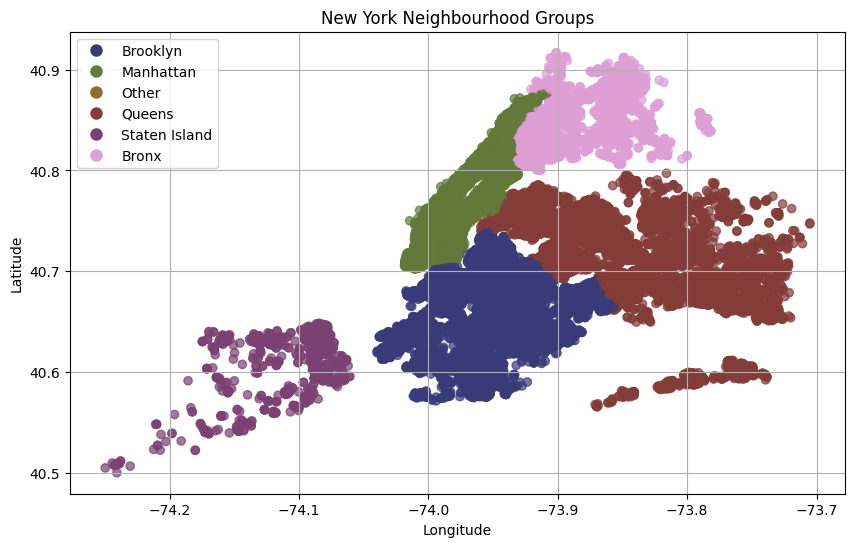

In [14]:
#Method to eliminate typos
value_counts = df["neighbourhood group"].value_counts()

valid_neighbourhood_groups = value_counts[value_counts > 3].index

df.loc[~df["neighbourhood group"].isin(valid_neighbourhood_groups), "neighbourhood group"] = "Other"

#method to get colors
unique_neighbourhoods_groups = df["neighbourhood group"].unique()

color_map = cm.get_cmap("tab20b", len(unique_neighbourhoods_groups))

group_to_color = {group: color_map(i) for i, group in enumerate(unique_neighbourhoods_groups)}

#method to plot the graph
plt.figure(figsize=(10, 6))
colors = [group_to_color[group] for group in df["neighbourhood group"]]
plt.scatter(df["long"], df["lat"], color= colors, marker="o", alpha=0.7)
plt.title("New York Neighbourhood Groups")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=district, markersize=10, markerfacecolor=group_to_color[district]) for district in unique_neighbourhoods_groups]
plt.legend(handles=legend_handles, loc="upper left")
plt.show()


# Questão 4
Conte quantas vezes aparece a palavra "smoking" na coluna de regras da casa (house_rules).

In [15]:
def count_certain_word_on_house_rules(word):
    num_of_certain_word_in_house_rules = df["house_rules"].str.contains(word, case= False).sum()
    return num_of_certain_word_in_house_rules

print(count_certain_word_on_house_rules("smoking"))

# I would use "smok" as the key word to capture the "Non-Smoker" examples. There are roughly 2k instances that adress the topic that are being ignored. If there was to be more depth in the analysis, it is also possible to argue that the data show little info given that "No smoking" and "smoking is allowed" are both counted. To solve this, one could use some regex patterns addresing the appearance of a "." between the "no" and the "smoking" of the sentences

30669


# Parte 2: Análise exploratória e preditiva

Chegamos na segunda parte do entregável!
Aqui será feita uma análise mais ampla do que o exercício anterior, por isso não existe um script com o que deve ser entregue nem uma única resposta correta. Todo raciocínio desenvolvido será considerado.

Usaremos uma base de dados diferente, em que estão representados características dos clientes de uma rede de supermercado.

O objetivo aqui é extrair insights para o supermercado, que pretende otimizar suas campanhas de marketing, reduzindo custos com clientes que provavelmente não se interessam por elas.

Tendo isso em vista, desenvolva uma análise exploratória dessa base de dados, buscando entender quais informações são importantes para o direcionamento adequado das campanhas de marketing e quais são os perfis de clientes do supermercado. Busque entender a relação entre as colunas e para isso você pode utilizar algumas bibliotecas para te auxiliar, como: MatPlotLib e Pandas.

Além disso, você pode pesquisar outras bibliotecas disponíveis, como a Scikit-learn, para complementar a sua análise com métodos de Machine Learning como K-Means e DBSCAN. Lembrando que a utilização desses métodos não é obrigatória. Além disso, busque organizar a sua entrega escrevendo todos os seus insights e conclusões em Markdowns.


## Explicação das colunas da base

* Year_Birth: Ano de nascimento
* Education: Grau de escolaridade
* Marital_Status: Estado Civil
* Income: Renda anual da residência
* Kidhome: Número de criaças pequenas na residência
* Teenhome: Número de adolescentes na residência
* Dt_Customer: Data em que o cliente foi cadastrado no supermercado
* Recency: Número de dias desde a última compra
* MntWines: Valor gasto em vinhos nos últimos 2 anos
* MntFruits: Valor gasto em frutas nos últimos 2 anos
* MntMeatProducts: Valor gasto em carne vermelha nos últimos 2 anos
* MntFishProducts: Valor gasto em pescados nos últimos 2 anos
* MntSweetProducts: Valor gasto em doces nos últimos 2 anos
* MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos
* NumDealsPurchases: Número de compras feitas com desconto
* NumWebPurchases: Número de compras feitas através do site do supermercado
* NumCatalogPurchases: Número de compras feitas através do Catálogo
* NumStorePurchases: Número de compras feitas diretamente em lojas físicas
* NumWebVisitsMonth: Número de visitas ao site do supermercado no último mês
* AcceptedCmp1: 1 se o cliente aceitou a oferta na primeira campanha de marketing, 0, caso contrário
* AcceptedCmp2: 1 se o cliente aceitou a oferta na segunda campanha de marketing, 0, caso contrário
* AcceptedCmp3: 1 se o cliente aceitou a oferta na terceira campanha de marketing, 0, caso contrário
* AcceptedCmp4: 1 se o cliente aceitou a oferta na quarta campanha de marketing, 0, caso contrário
* AcceptedCmp5: 1 se o cliente aceitou a oferta na quinta campanha de marketing, 0, caso contrário
* Complain: 1 se o cliente reclamou nos últimos 2 anos, 0, caso contrário
* Response: 1 se o cliente aceitou a oferta na última campanha, 0, caso contrário


Segue links que possam ser úteis nessa parte do entregável:

* https://blog.betrybe.com/tecnologia/clusterizacao/

* https://www.devmedia.com.br/data-mining-na-pratica-algoritmo-k-means/4584

* https://gabriellm.medium.com/entendendo-dbscan-770f680d9160







### Our analysis is going to focus mainly in the relationship between demographical information and the consumer patterns. As such, I'm going to:

## 1 - Preprocess the Data

## 2 -  Perform univariate analysis

## 3 - Offer correlations overview

## 4 - Visualize correlations

## 5 - Perform significance analysis

## 1 - Preprocessing. 

### Here I will manipulate the data by removing problematic entries and creating new useful columns.

In [451]:
df2 = pd.read_csv('campanha_marketing.csv',sep=';')

# i don't like Nan
df2 = drop_data_with_nan_in_column(df2, "Income")

# let's start by adding columns and classifying columns
Num_columns = [col for col in df2.columns if col.startswith("Num")]
mnt_columns = [col for col in df2.columns if col.startswith("Mnt")]
df2["Mnttotal"] = df2[mnt_columns].sum(axis=1)

# I don't like this date format, so I will try to change it to client age
df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'], dayfirst= True)
current_date = pd.to_datetime('now')
df2['Customer_Age'] = ((current_date - pd.to_datetime(df2['Dt_Customer'], dayfirst=True)).dt.days) 

# i don't like the year of birth metric, so I will try to change it to age
current_year = datetime.now().year

df2['Age'] = ((current_year - df2["Year_Birth"]))

# i don't think the kidhome and teenhome columns should be that specific. I will make them a single column

df2["KidsorTeenshome"] = df2["Kidhome"] + df2["Teenhome"]

print(df2["KidsorTeenshome"])

# marital status isn't standardized. Also, there's too much fragmentation of information. I will try to groupd them in single or married
df2['Marital_Status'] = df2['Marital_Status'].str.lower().replace({'alone': 'single', 'together' : 'married', "yolo" : 'single', "absurd" : "single", 'divorced' : "single", "widow" : "single" })

# i will remove the outiers
def remove_outliers_from_cols(dataframe, cols, threshold, exclude_cols=[]):
    cleaned_df = dataframe.copy()  # create a copy of the original DataFrame
    outliers_dfs = []  # list to store outliers DataFrames
    
    for col in cols:
        if col in exclude_cols:
            continue  # skip this column
        mean = cleaned_df[col].mean()
        std = cleaned_df[col].std()
        z_scores = (cleaned_df[col] - mean) / std
        outliers = cleaned_df[abs(z_scores) > threshold]
        cleaned_df = cleaned_df[abs(z_scores) <= threshold]
        outliers['Outlier Reason'] = f'{col} outliers'
        outliers_dfs.append(outliers)  # add outliers DataFrame to the list
    
    if outliers_dfs:
        outliers_df = pd.concat(outliers_dfs)
    else:
        outliers_df = pd.DataFrame()
    
    return cleaned_df, outliers_df

numeric_cols = df2.select_dtypes(include=["number"]).columns.tolist()
exclude_cols = ["ID"]  
df2, df2_outliers = remove_outliers_from_cols(df2, numeric_cols, threshold=4, exclude_cols=exclude_cols)


df2.reset_index(drop=True, inplace=True)
df2.loc[:, 'ID'] = df2.index

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: KidsorTeenshome, Length: 2216, dtype: int64


### That's way better. The Mntotal and age column will be really useful for general analysis. Although we lost some entries due to Nan and them having outlier values, the size of the data frame makes it so there's no problem in eliminating a few values. The threshold of 4 can be altered.

## 2 -  Univariate analysis

### Let's get an overview of our data. Particularly, I'm interested in the demographical distribution.

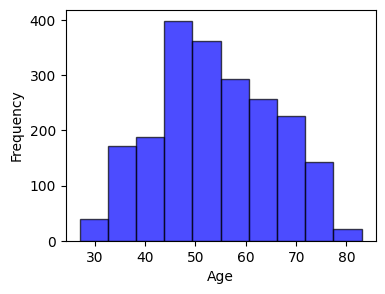

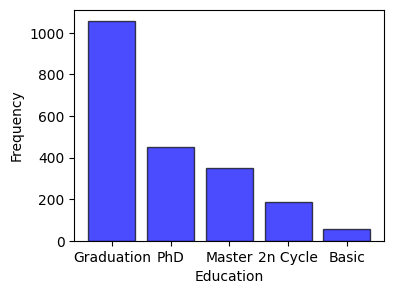

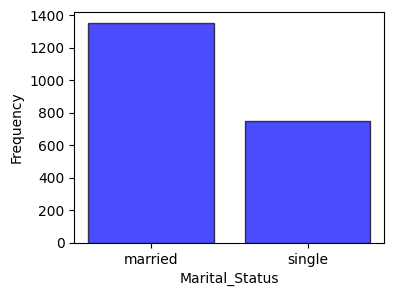

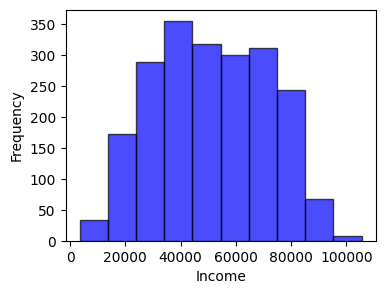

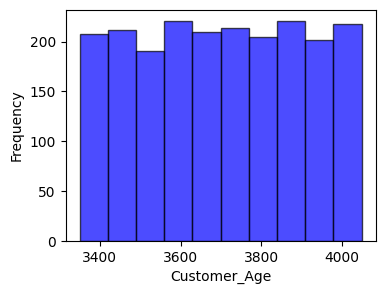

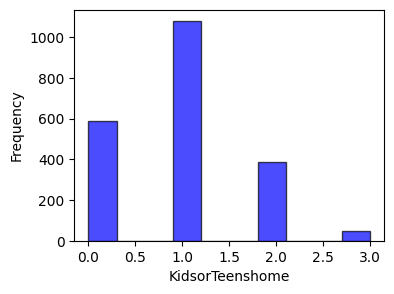

In [452]:
# I will try to separate the variables in "explanatory" and "response" variables. Although I know observational studies don't have explanatory and response variables I couldn't figure any better name to differ the variables of interest;
explanatory_vars = ["Age","Education","Marital_Status", "Income", "Customer_Age", "KidsorTeenshome"]

# income is in both groups because I want to verify how income is affected by some characteristics of the client, in order to reduce confounding
response_vars = mnt_columns + Num_columns

def numerical_graph(col):
  plt.figure(figsize=(4, 3))
  plt.hist(df2[col], bins=10, color= 'blue', edgecolor='black', alpha=0.7)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

def categorical_graph(col):
    plt.figure(figsize=(4, 3))
    counter = df2[col].value_counts()
    plt.bar(counter.index, counter.values, color='blue', alpha=0.7, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


def plot_univariate_graphs(cols, exclude_cols):
    for col in cols:
        if col not in exclude_cols:
            if df2[col].dtype == 'object':
                categorical_graph(col)
            else:
                numerical_graph(col)

exclude_cols = ["ID", "Recency","Year_Birth","Dt_Customer"]

plot_univariate_graphs(explanatory_vars,exclude_cols = exclude_cols)

### Probably because the data is old, it appears the super market clients are on the older side, with a mode around 50 years.

### Surprisingly, most of the clients are graduates. Some are even PHD's and Masters. There are few people with only basic education.

### Most of the clients have a reliable significant other, in a proportion of ~3/4 of the data set

### The average income is pretty high when compared to the average american, being around 50000.

### It seems that the customer base has been growing pretty steadily, without gaps in Customer Age

## 3 - Correlations overview

### Here I will try to numerically see if there are some noteworthy correlations.

In [454]:
# method to calculate correlation between categories and numbers
def correlation_ratio_with_p_value(categories, values):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = values[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(values, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)

    # Perform ANOVA to get the p-value
    _, p_value = f_oneway(*[values[fcat == i] for i in range(cat_num)])

    return eta, p_value

# method to sort if correlation_ratio or simple .corr should be used
def calculate_correlations(df, explanatory_vars, response_vars):
    correlations = {}

    for ex_var in explanatory_vars:
        if df[ex_var].dtype == 'object':  # Categorical explanatory variable
            le = LabelEncoder()
            encoded_ex_var = le.fit_transform(df[ex_var])
            for res_var in response_vars:
                corr, p_value = correlation_ratio_with_p_value(encoded_ex_var, df[res_var])
                correlations[(ex_var, res_var)] = corr
        else:  # Numerical explanatory variable
            for res_var in response_vars:
                corr = df[[ex_var, res_var]].corr().iloc[0, 1]  # Calculate Pearson correlation coefficient
                correlations[(ex_var, res_var)] = corr
            
    return correlations, p_value

correlations, p_value = calculate_correlations(df2, explanatory_vars, response_vars)

for (ex_var, res_var), corr in correlations.items():
    print(f"Correlation between '{ex_var}' and '{res_var}': {corr}")

Correlation between 'Age' and 'MntWines': 0.16769496650657775
Correlation between 'Age' and 'MntFruits': 0.010076415437533294
Correlation between 'Age' and 'MntMeatProducts': 0.05448830091100395
Correlation between 'Age' and 'MntFishProducts': 0.04387616071922873
Correlation between 'Age' and 'MntSweetProducts': 0.014392167633432654
Correlation between 'Age' and 'MntGoldProds': 0.07070694078673792
Correlation between 'Age' and 'NumDealsPurchases': 0.08392140057875988
Correlation between 'Age' and 'NumWebPurchases': 0.1658018479268763
Correlation between 'Age' and 'NumCatalogPurchases': 0.1557735376494723
Correlation between 'Age' and 'NumStorePurchases': 0.15067093130216105
Correlation between 'Age' and 'NumWebVisitsMonth': -0.13516471057812582
Correlation between 'Education' and 'MntWines': 0.23425452231056496
Correlation between 'Education' and 'MntFruits': 0.13559936475808038
Correlation between 'Education' and 'MntMeatProducts': 0.12662648716723646
Correlation between 'Education' a

### Looks like we have found plenty of correlations between our variables. 

## 4 - Correlation visualization

### Let's try to visualize the correlations with some scatterplots.

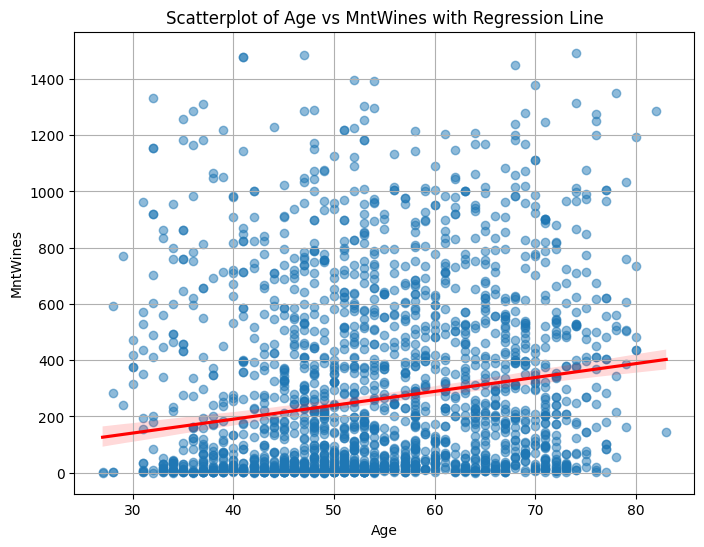

Linear Regression Results for Age vs MntWines:
Slope: 4.7392, Intercept: 40.9055, R-squared: 0.0281, P-value: 0.0000, Std Err: 0.6080


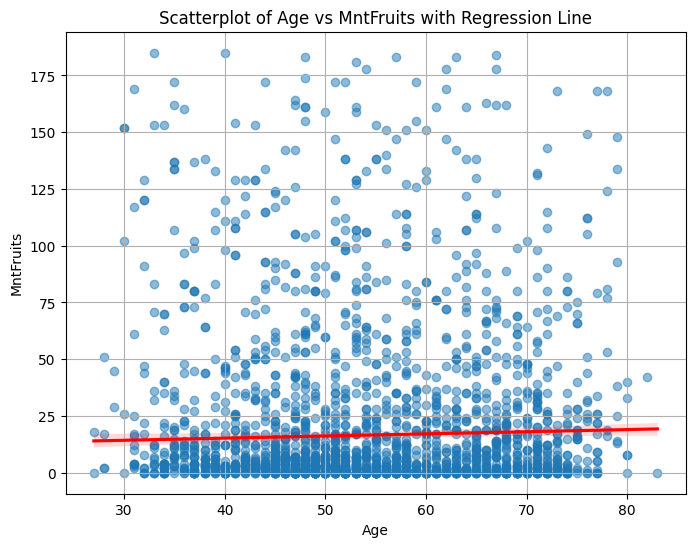

Linear Regression Results for Age vs MntFruits:
Slope: 0.0329, Intercept: 23.7188, R-squared: 0.0001, P-value: 0.6443, Std Err: 0.0713


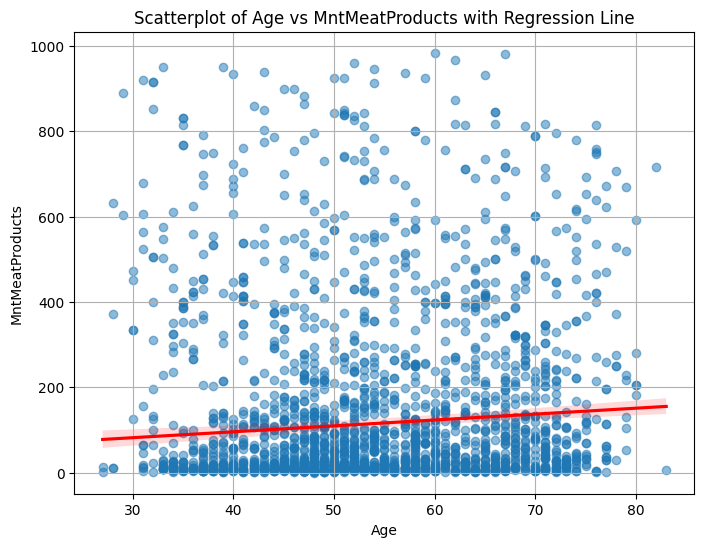

Linear Regression Results for Age vs MntMeatProducts:
Slope: 0.9976, Intercept: 107.3964, R-squared: 0.0030, P-value: 0.0125, Std Err: 0.3989


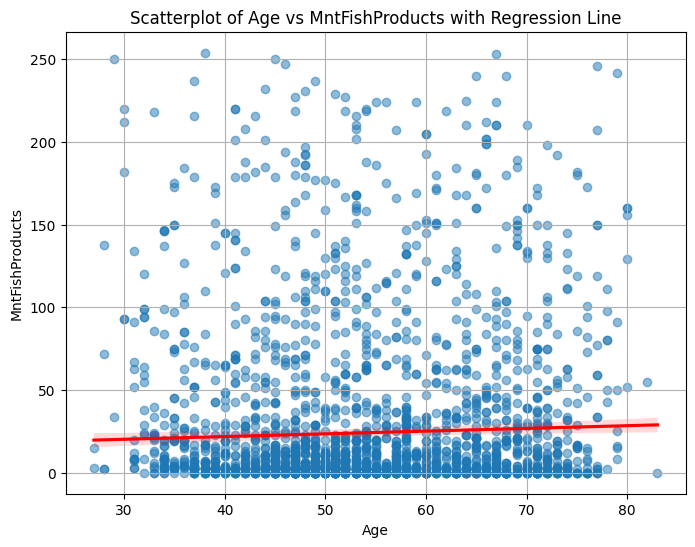

Linear Regression Results for Age vs MntFishProducts:
Slope: 0.2007, Intercept: 25.8871, R-squared: 0.0019, P-value: 0.0443, Std Err: 0.0997


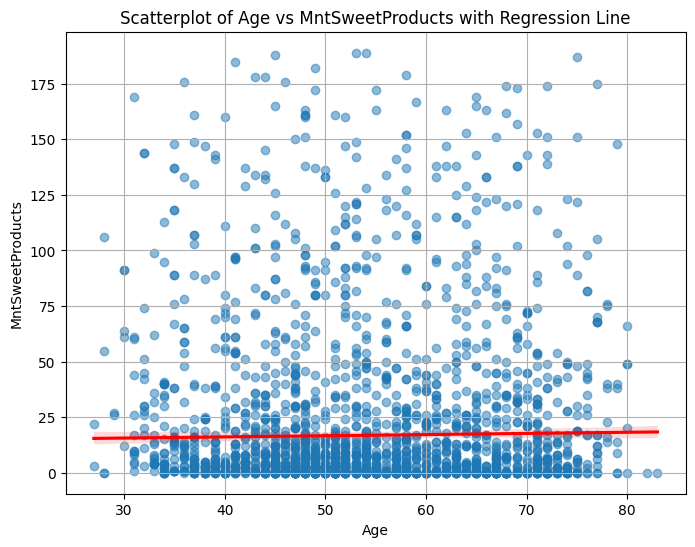

Linear Regression Results for Age vs MntSweetProducts:
Slope: 0.0476, Intercept: 23.1836, R-squared: 0.0002, P-value: 0.5096, Std Err: 0.0721


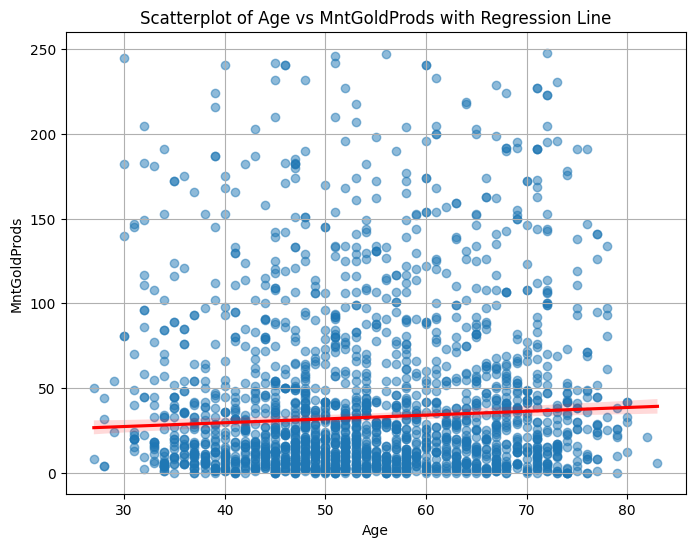

Linear Regression Results for Age vs MntGoldProds:
Slope: 0.3044, Intercept: 26.2674, R-squared: 0.0050, P-value: 0.0012, Std Err: 0.0937


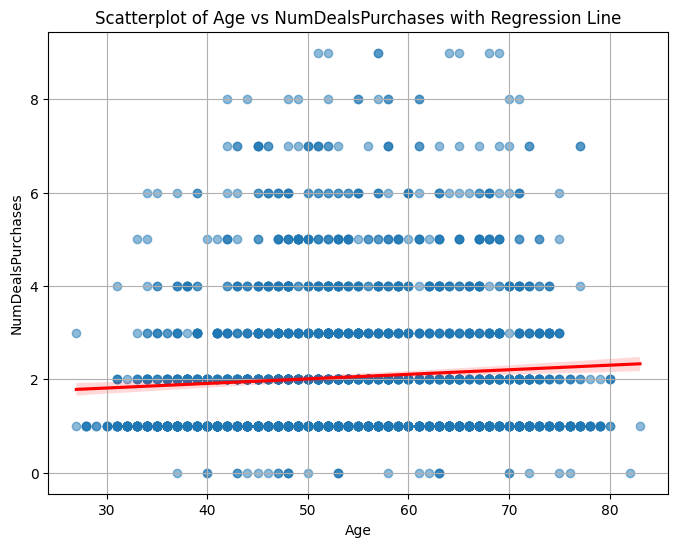

Linear Regression Results for Age vs NumDealsPurchases:
Slope: 0.0116, Intercept: 1.6133, R-squared: 0.0070, P-value: 0.0001, Std Err: 0.0030


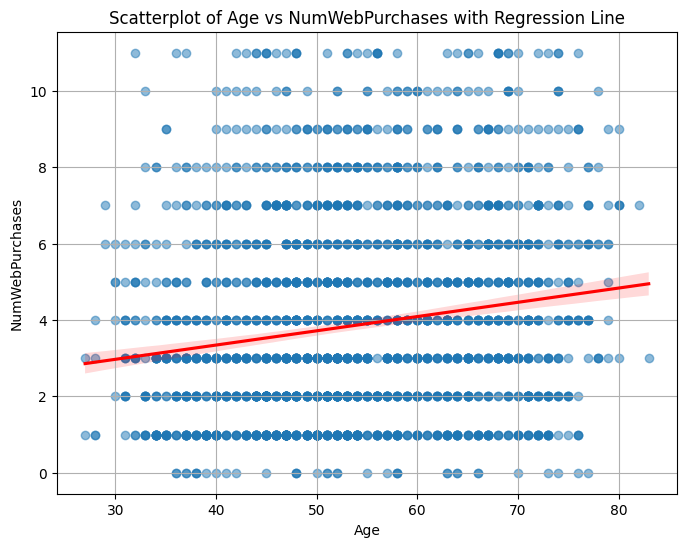

Linear Regression Results for Age vs NumWebPurchases:
Slope: 0.0371, Intercept: 2.0351, R-squared: 0.0275, P-value: 0.0000, Std Err: 0.0048


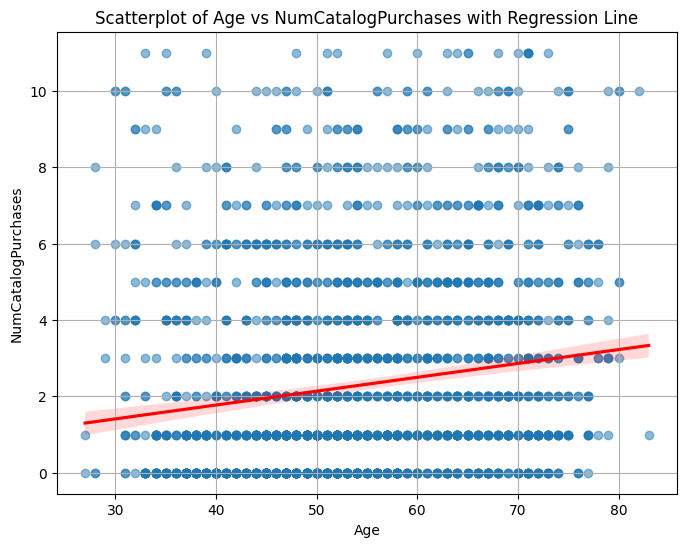

Linear Regression Results for Age vs NumCatalogPurchases:
Slope: 0.0363, Intercept: 0.6068, R-squared: 0.0243, P-value: 0.0000, Std Err: 0.0050


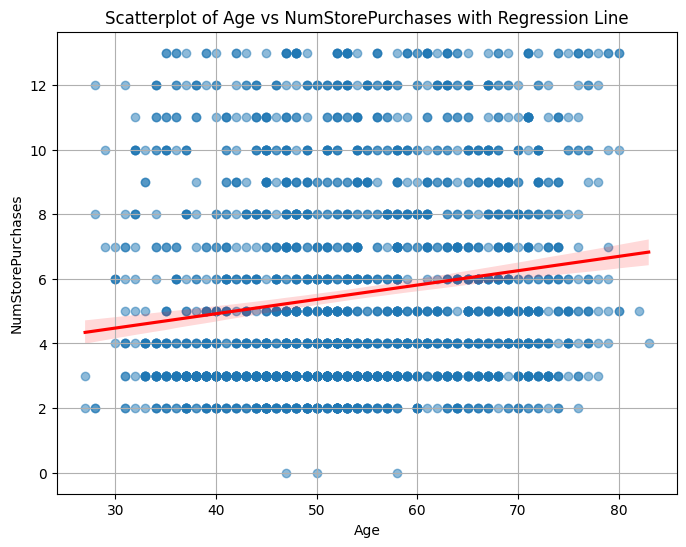

Linear Regression Results for Age vs NumStorePurchases:
Slope: 0.0413, Intercept: 3.5327, R-squared: 0.0227, P-value: 0.0000, Std Err: 0.0059


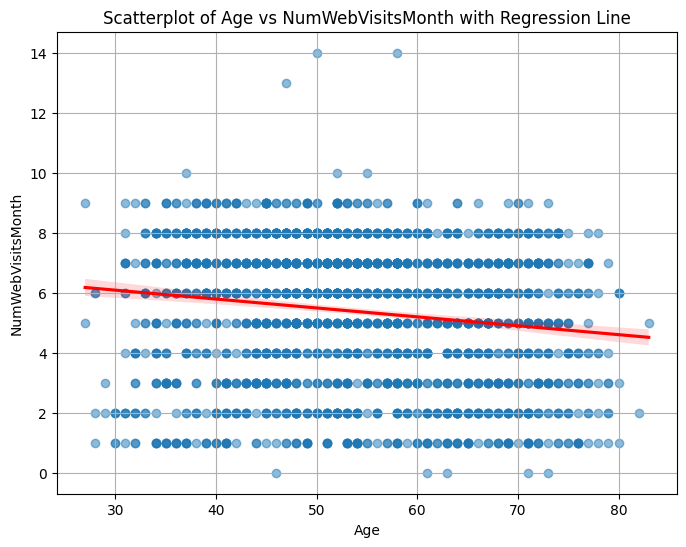

Linear Regression Results for Age vs NumWebVisitsMonth:
Slope: -0.0265, Intercept: 6.7536, R-squared: 0.0183, P-value: 0.0000, Std Err: 0.0042


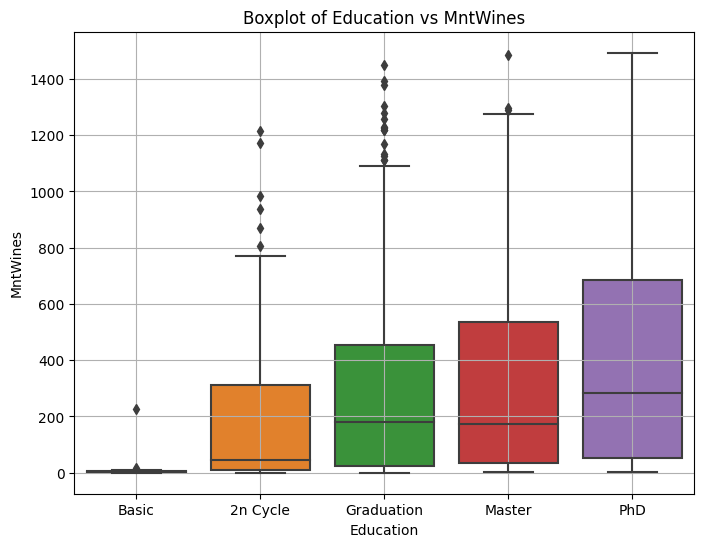

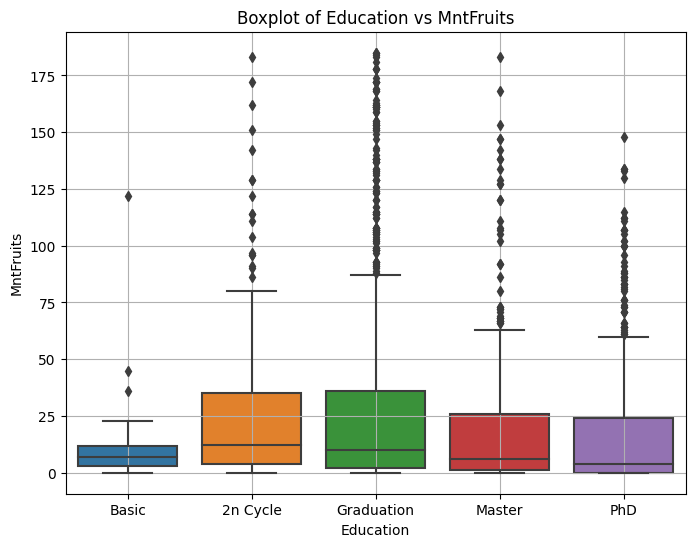

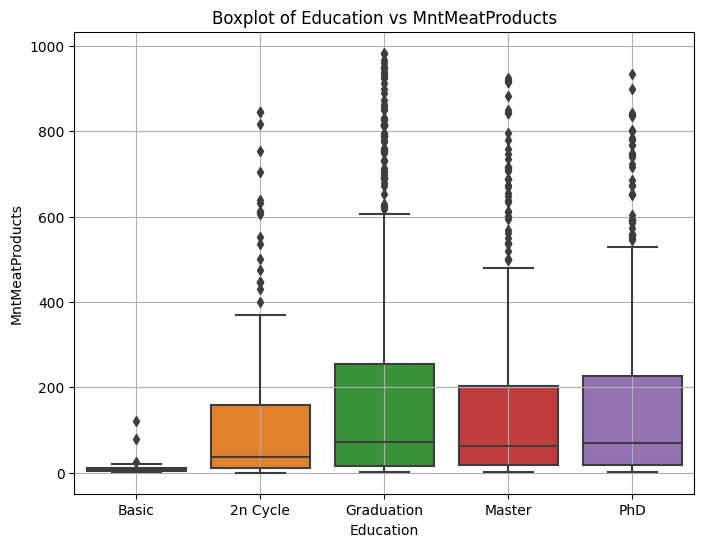

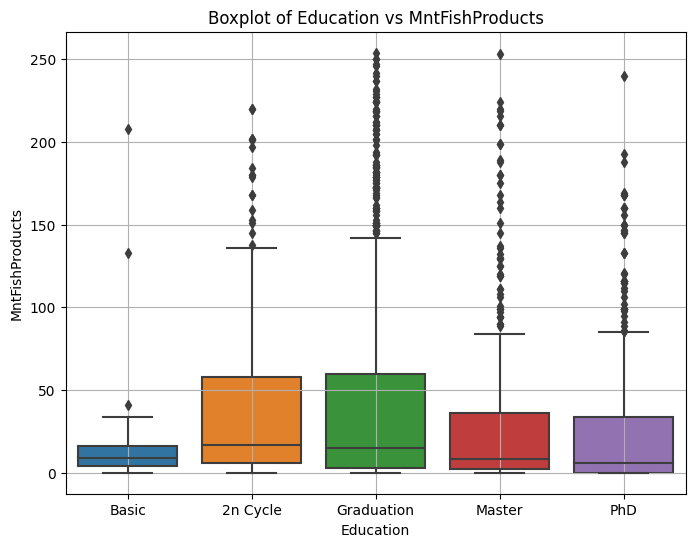

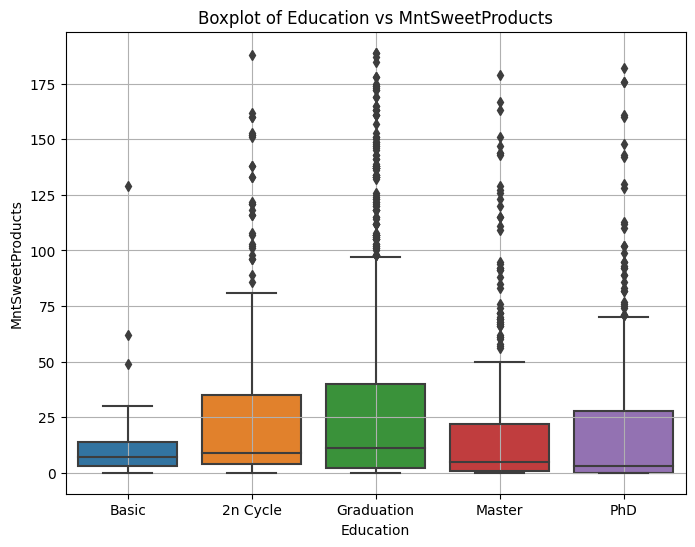

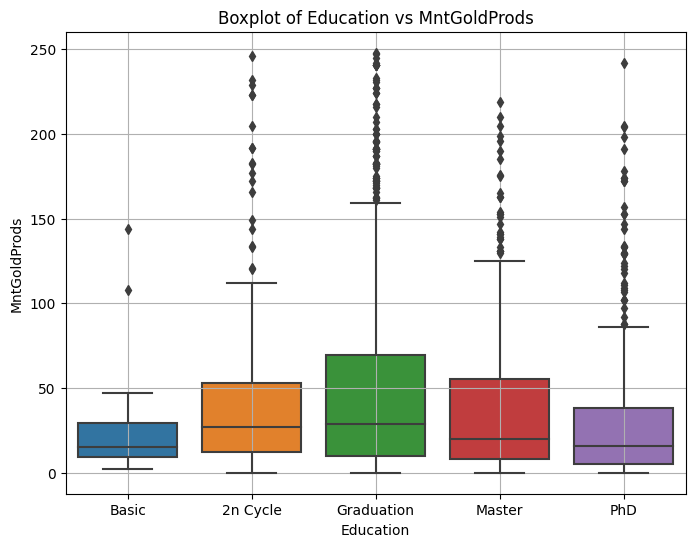

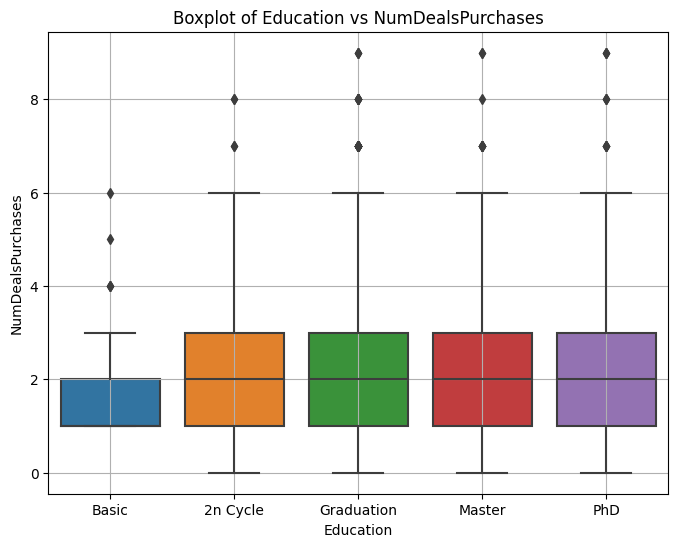

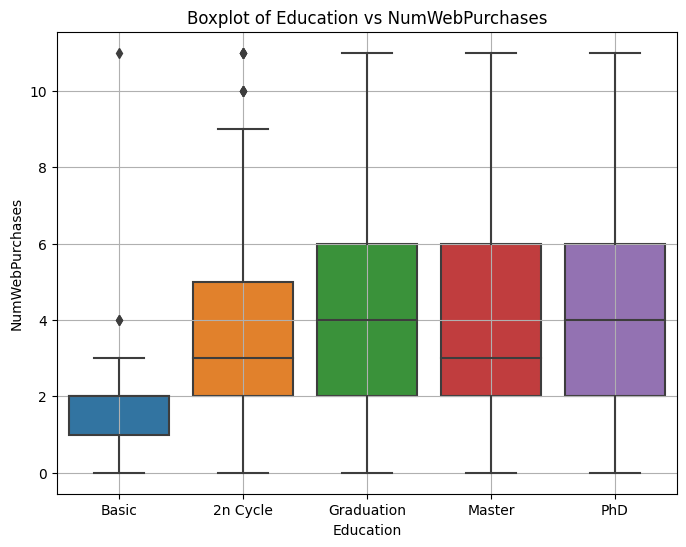

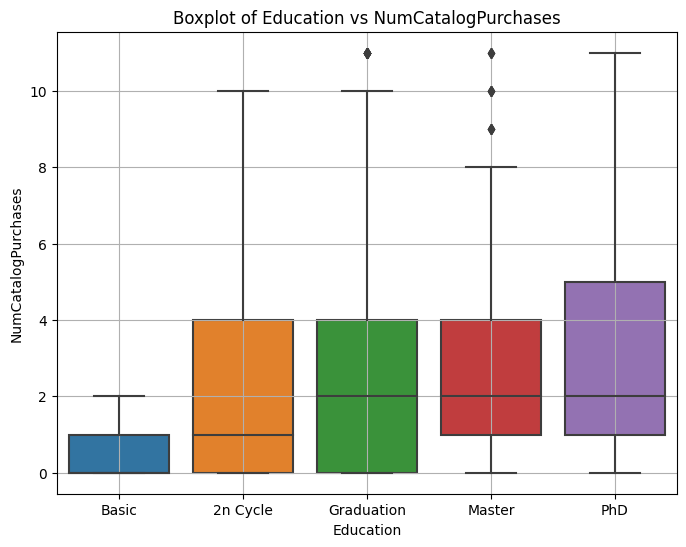

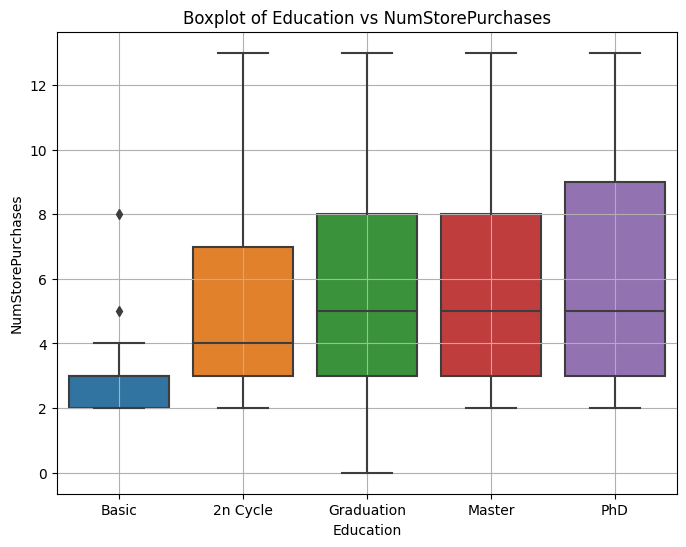

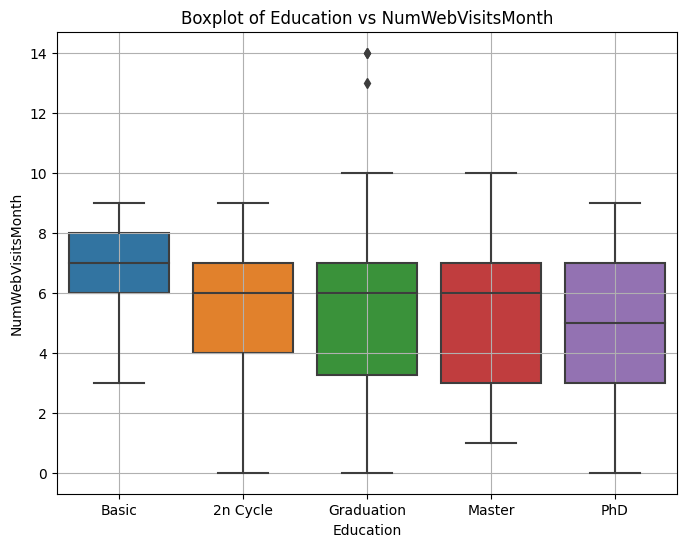

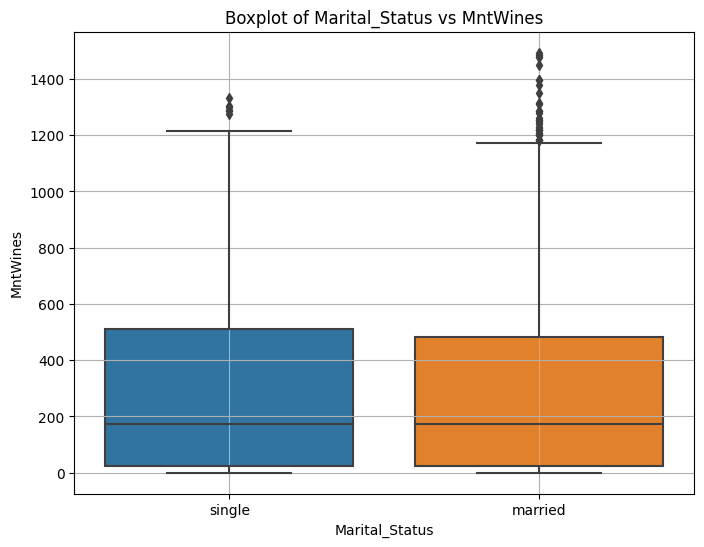

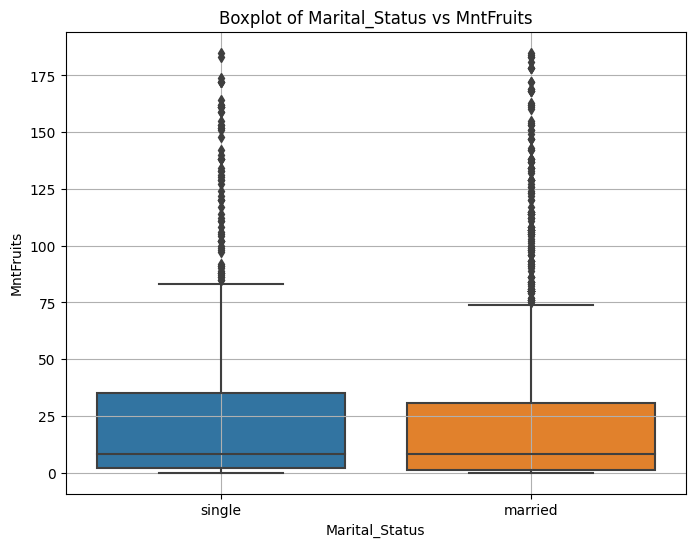

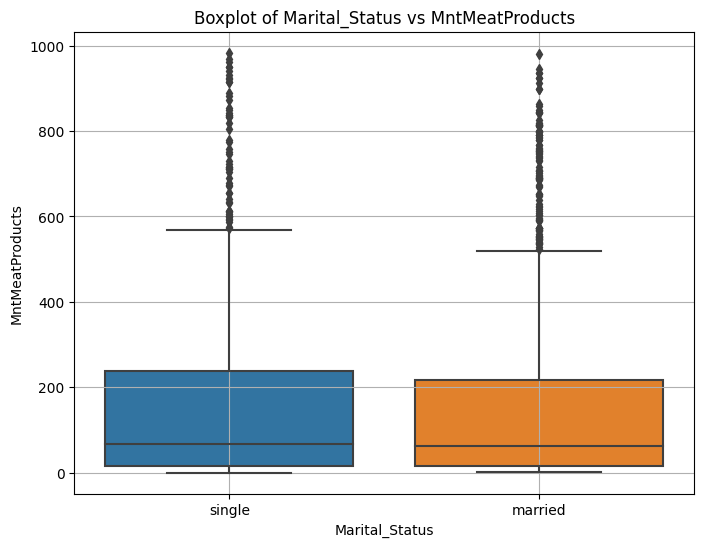

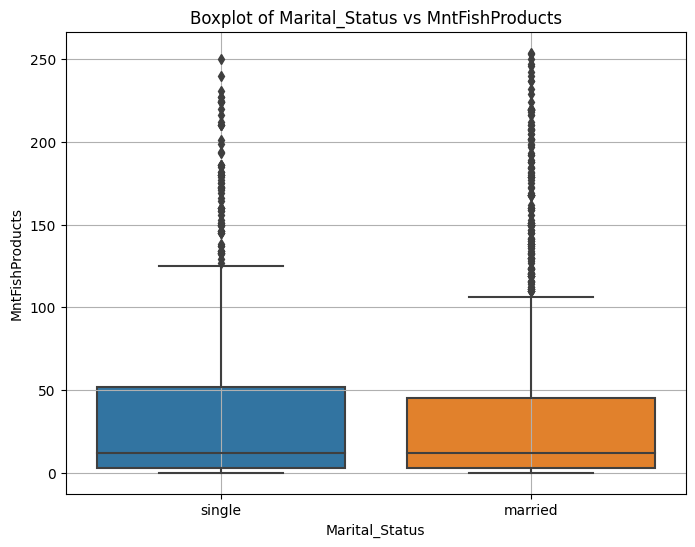

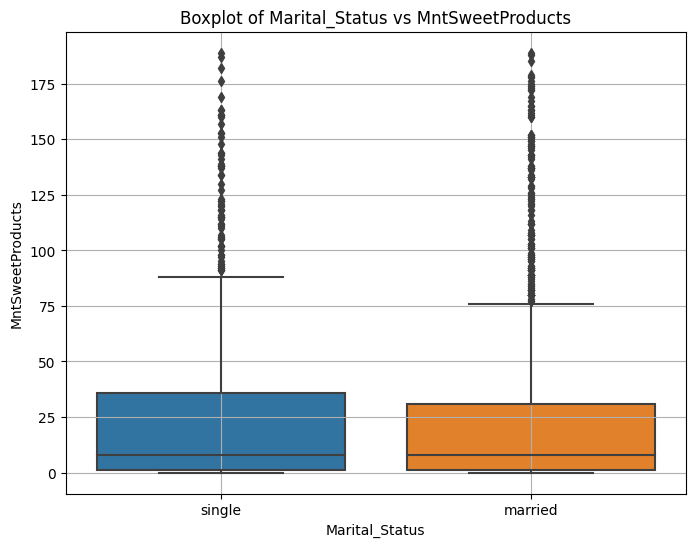

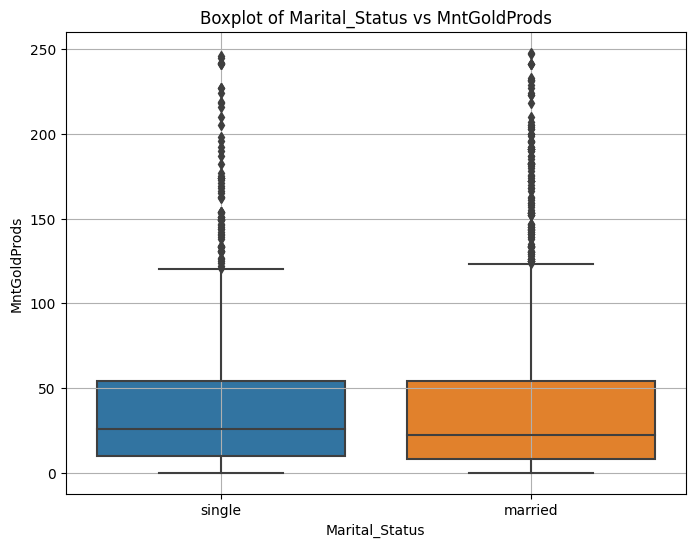

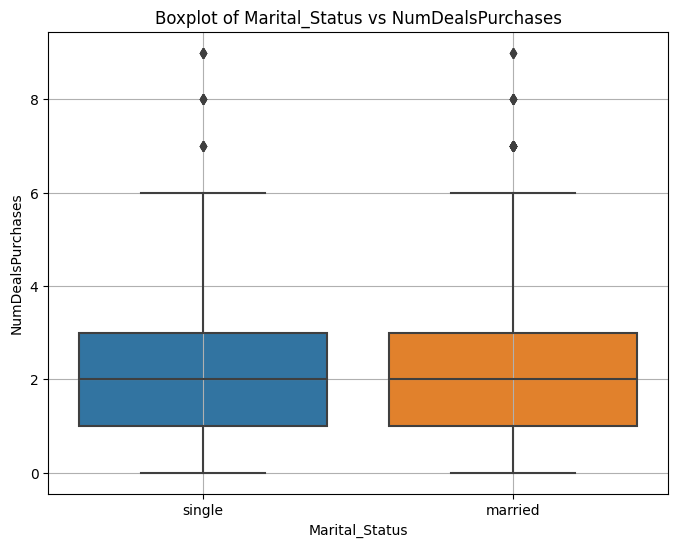

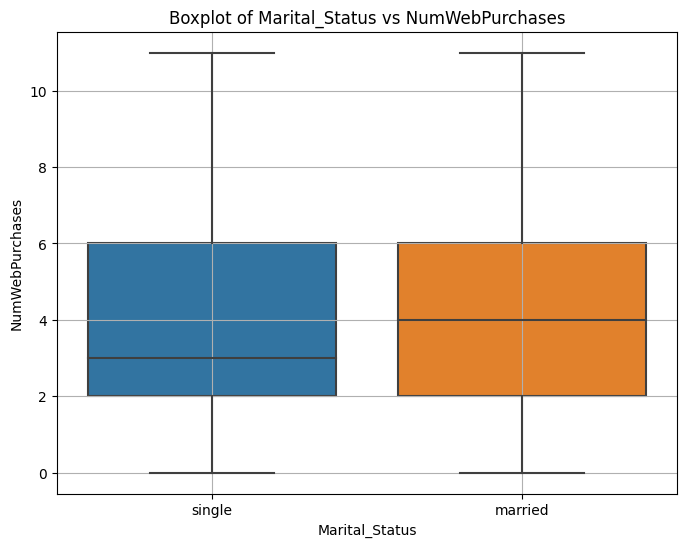

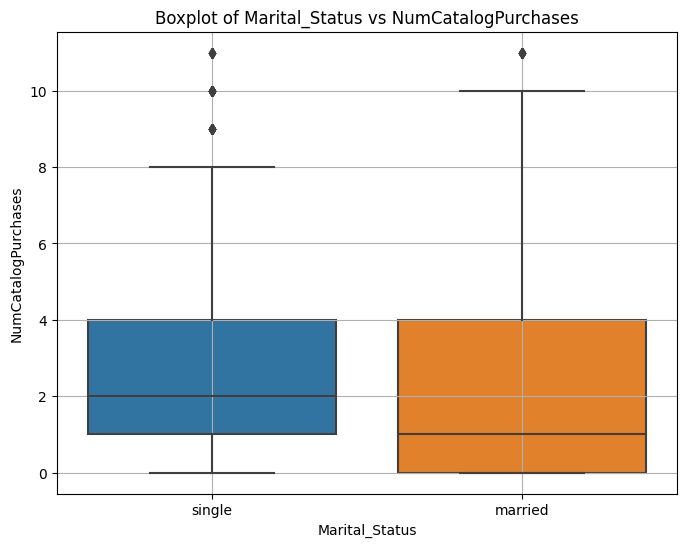

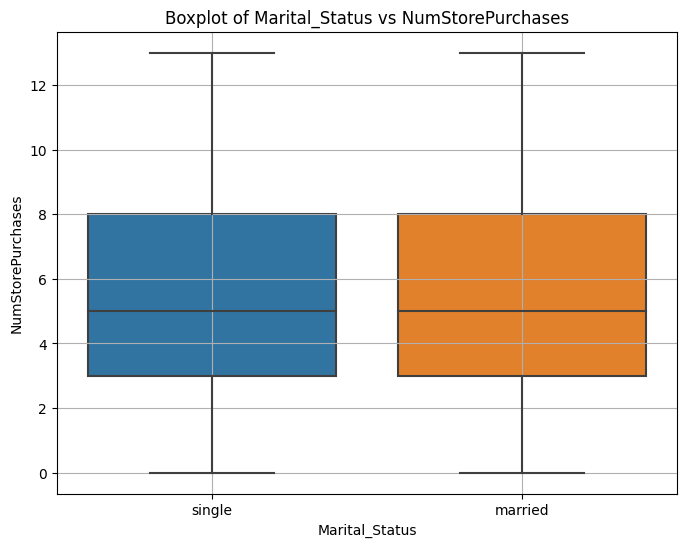

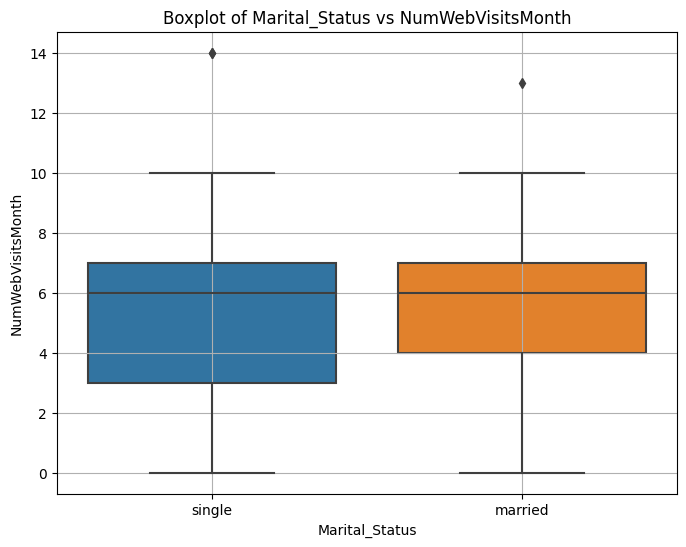

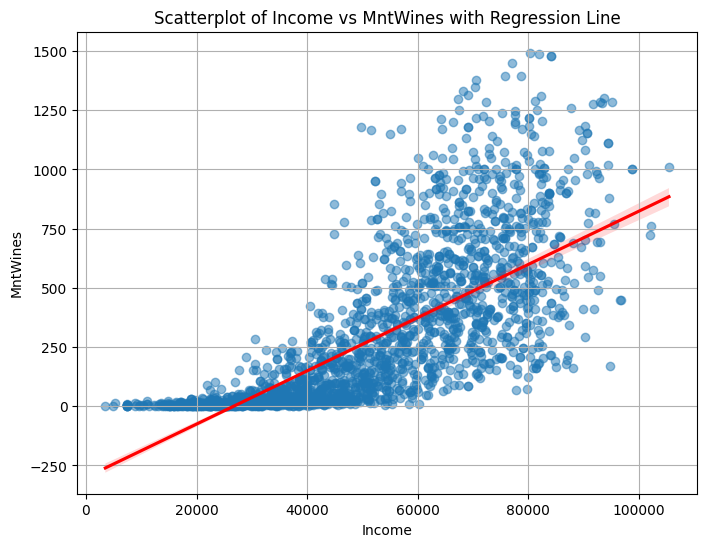

Linear Regression Results for Income vs MntWines:
Slope: 0.0121, Intercept: -321.6684, R-squared: 0.5573, P-value: 0.0000, Std Err: 0.0002


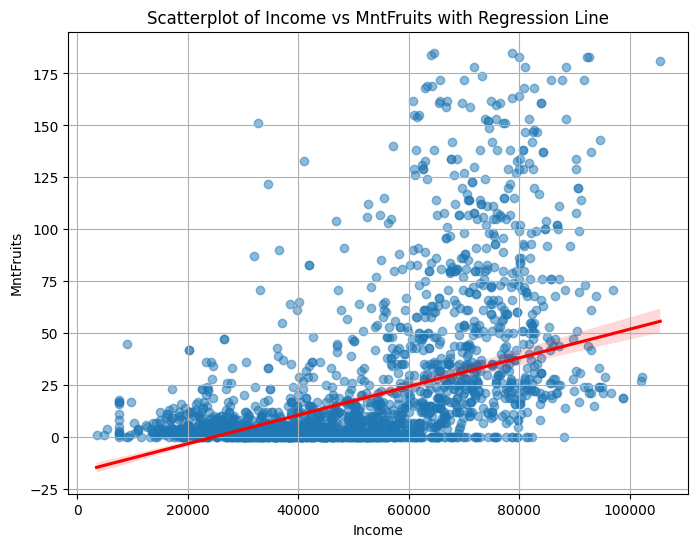

Linear Regression Results for Income vs MntFruits:
Slope: 0.0010, Intercept: -26.8849, R-squared: 0.2993, P-value: 0.0000, Std Err: 0.0000


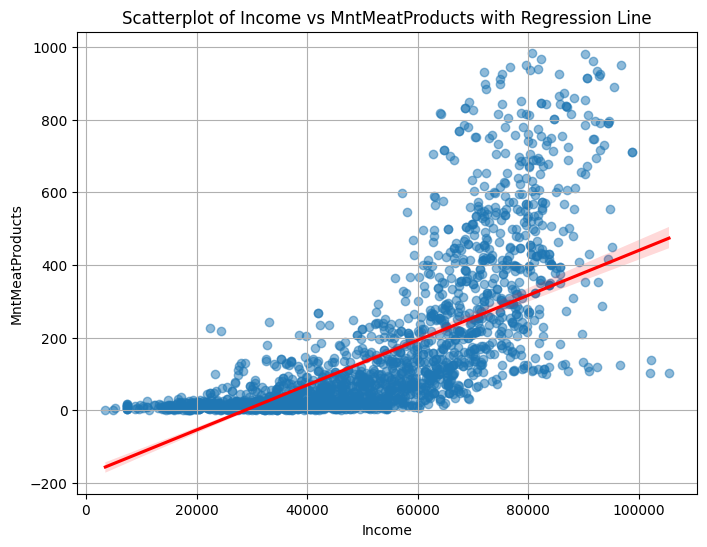

Linear Regression Results for Income vs MntMeatProducts:
Slope: 0.0076, Intercept: -228.0119, R-squared: 0.5258, P-value: 0.0000, Std Err: 0.0002


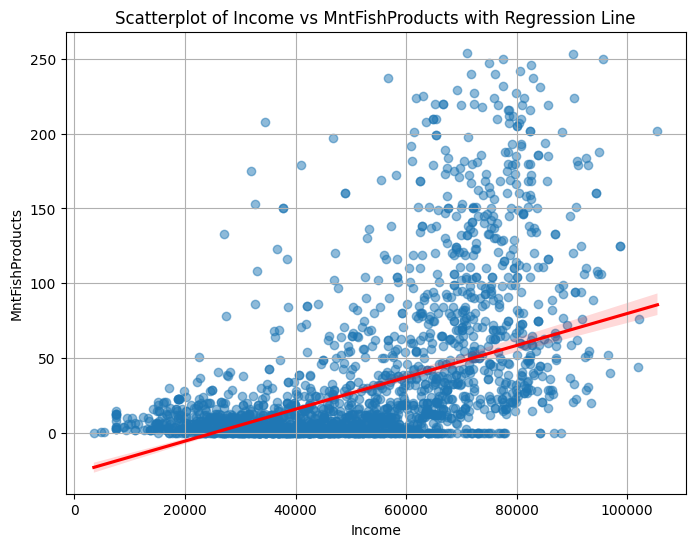

Linear Regression Results for Income vs MntFishProducts:
Slope: 0.0015, Intercept: -39.0287, R-squared: 0.3191, P-value: 0.0000, Std Err: 0.0000


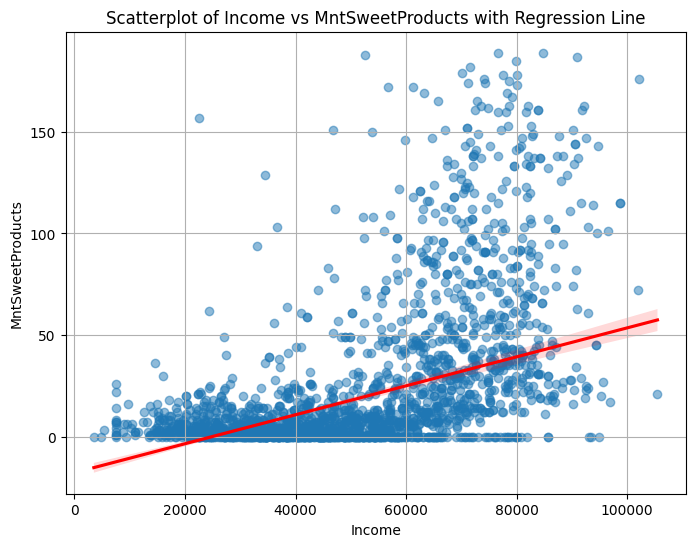

Linear Regression Results for Income vs MntSweetProducts:
Slope: 0.0011, Intercept: -28.1035, R-squared: 0.3085, P-value: 0.0000, Std Err: 0.0000


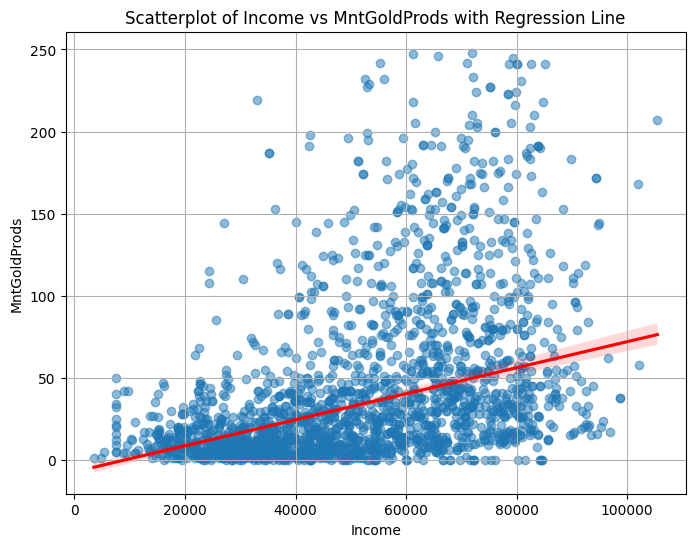

Linear Regression Results for Income vs MntGoldProds:
Slope: 0.0011, Intercept: -12.9656, R-squared: 0.1946, P-value: 0.0000, Std Err: 0.0000


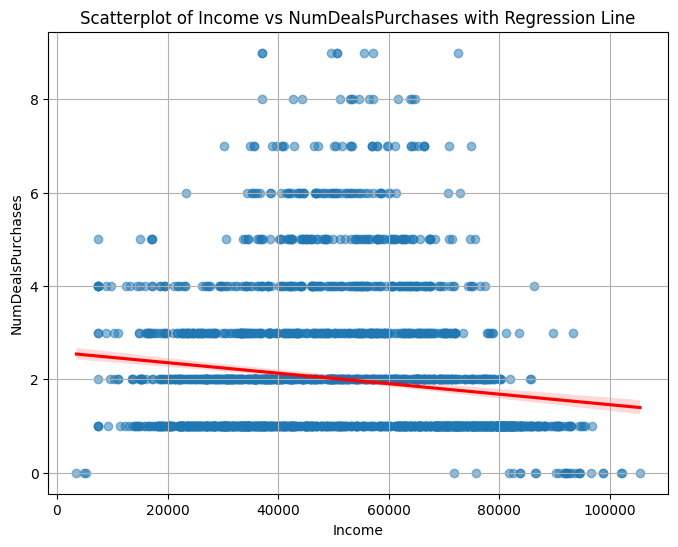

Linear Regression Results for Income vs NumDealsPurchases:
Slope: -0.0000, Intercept: 2.7792, R-squared: 0.0176, P-value: 0.0000, Std Err: 0.0000


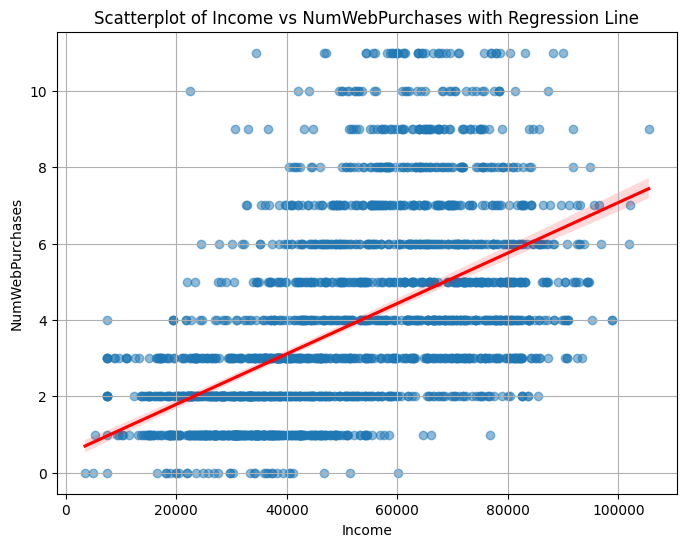

Linear Regression Results for Income vs NumWebPurchases:
Slope: 0.0001, Intercept: 0.5376, R-squared: 0.2851, P-value: 0.0000, Std Err: 0.0000


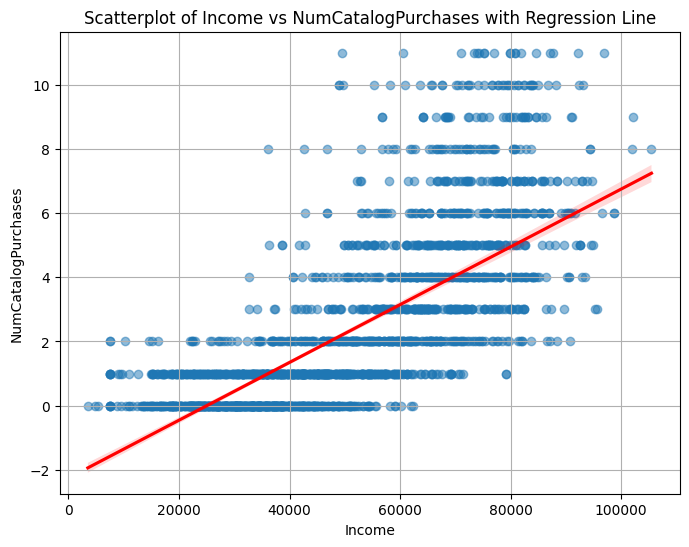

Linear Regression Results for Income vs NumCatalogPurchases:
Slope: 0.0001, Intercept: -2.4473, R-squared: 0.5385, P-value: 0.0000, Std Err: 0.0000


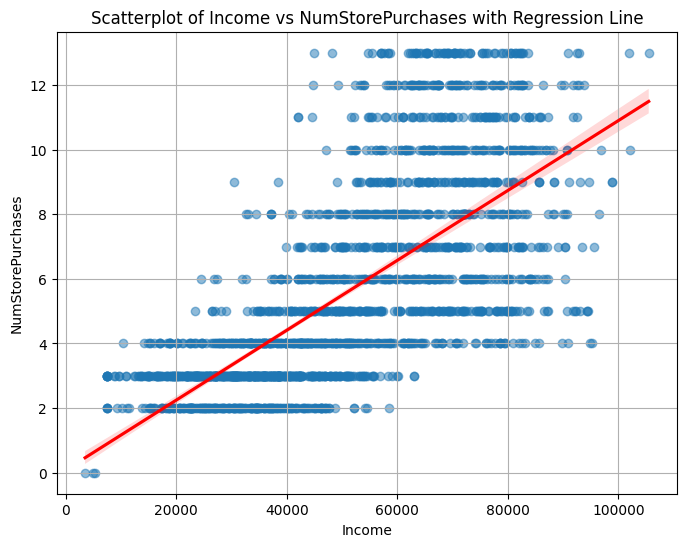

Linear Regression Results for Income vs NumStorePurchases:
Slope: 0.0001, Intercept: 0.1648, R-squared: 0.4846, P-value: 0.0000, Std Err: 0.0000


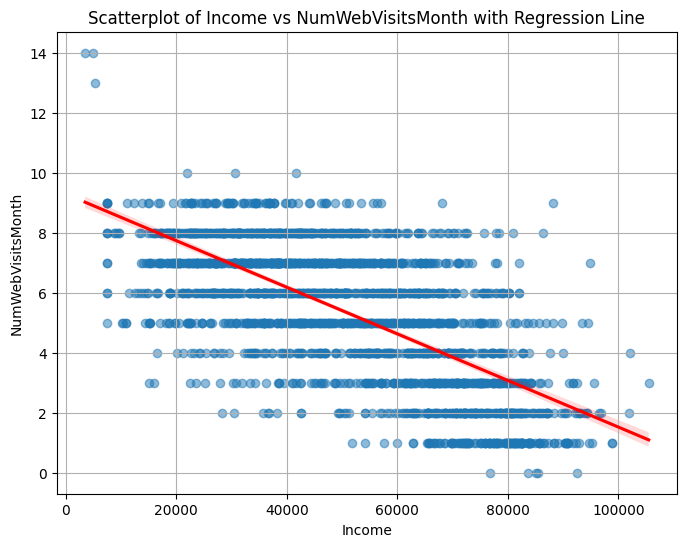

Linear Regression Results for Income vs NumWebVisitsMonth:
Slope: -0.0001, Intercept: 9.1244, R-squared: 0.4371, P-value: 0.0000, Std Err: 0.0000


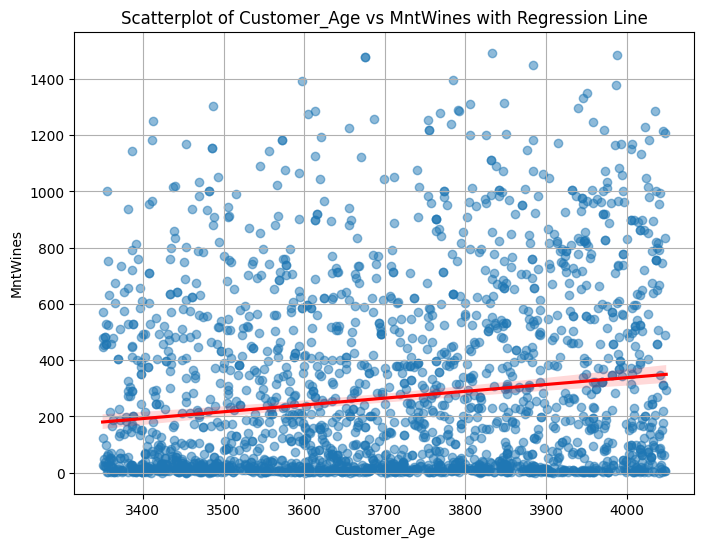

Linear Regression Results for Customer_Age vs MntWines:
Slope: 0.2753, Intercept: -722.2312, R-squared: 0.0284, P-value: 0.0000, Std Err: 0.0351


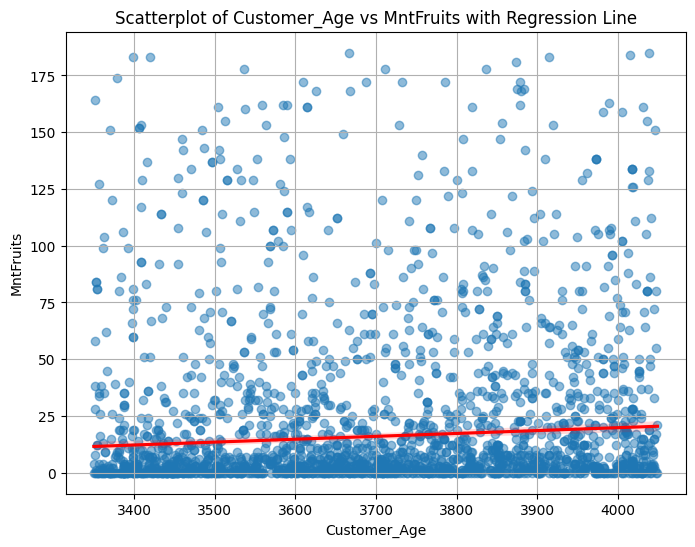

Linear Regression Results for Customer_Age vs MntFruits:
Slope: 0.0139, Intercept: -26.1351, R-squared: 0.0055, P-value: 0.0007, Std Err: 0.0041


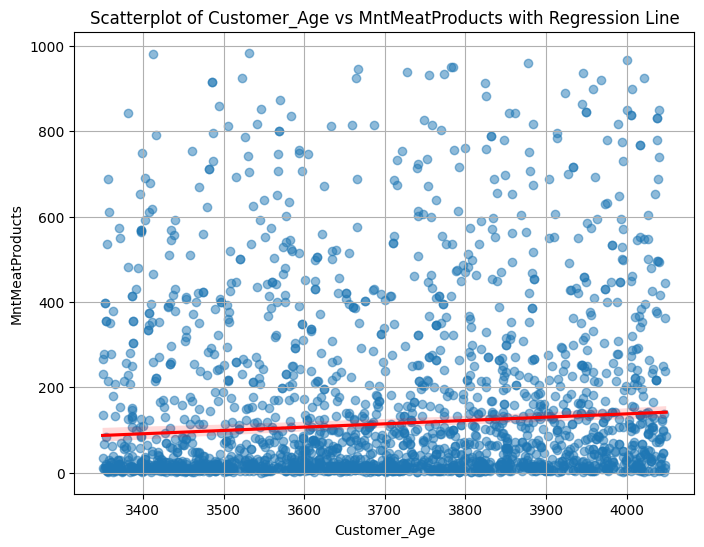

Linear Regression Results for Customer_Age vs MntMeatProducts:
Slope: 0.0976, Intercept: -199.9295, R-squared: 0.0085, P-value: 0.0000, Std Err: 0.0230


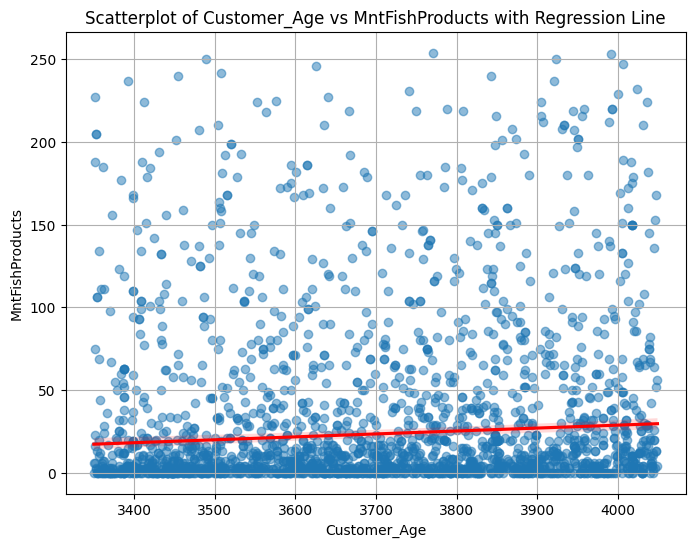

Linear Regression Results for Customer_Age vs MntFishProducts:
Slope: 0.0229, Intercept: -48.2143, R-squared: 0.0075, P-value: 0.0001, Std Err: 0.0057


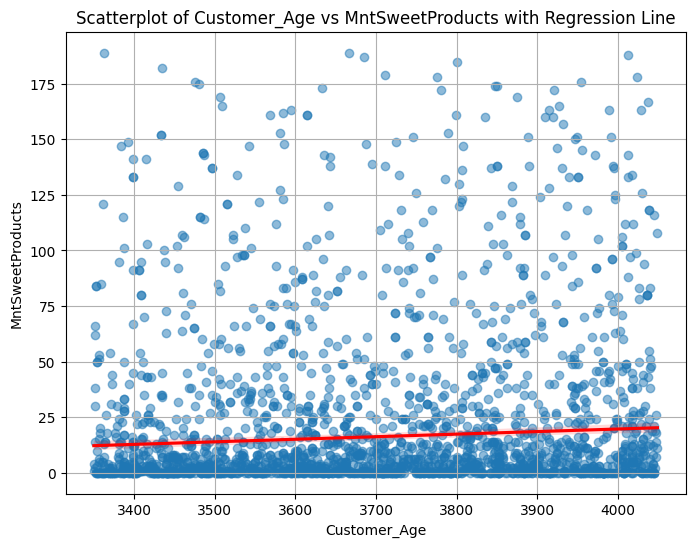

Linear Regression Results for Customer_Age vs MntSweetProducts:
Slope: 0.0172, Intercept: -37.7842, R-squared: 0.0081, P-value: 0.0000, Std Err: 0.0042


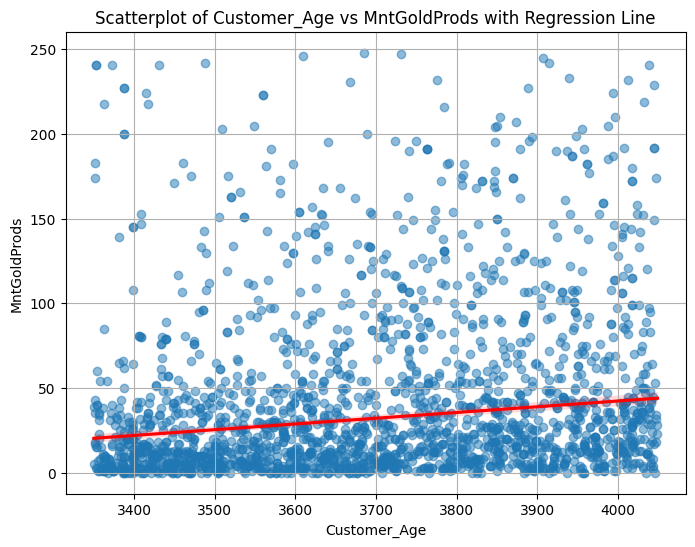

Linear Regression Results for Customer_Age vs MntGoldProds:
Slope: 0.0421, Intercept: -113.2259, R-squared: 0.0286, P-value: 0.0000, Std Err: 0.0054


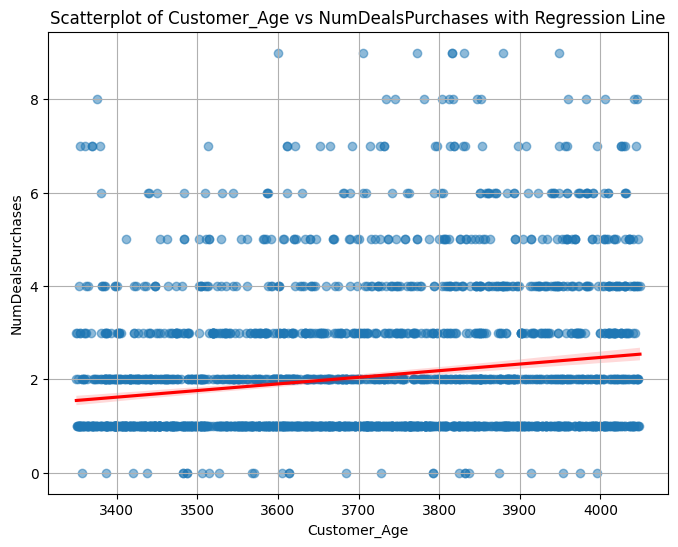

Linear Regression Results for Customer_Age vs NumDealsPurchases:
Slope: 0.0017, Intercept: -4.0084, R-squared: 0.0445, P-value: 0.0000, Std Err: 0.0002


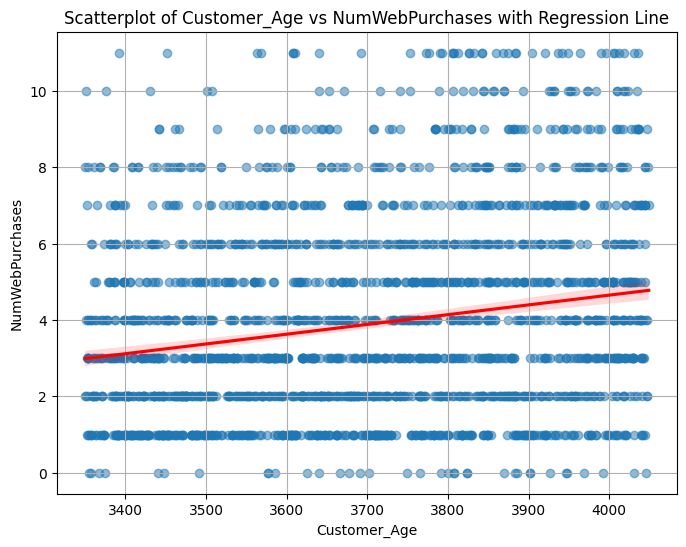

Linear Regression Results for Customer_Age vs NumWebPurchases:
Slope: 0.0027, Intercept: -5.9106, R-squared: 0.0432, P-value: 0.0000, Std Err: 0.0003


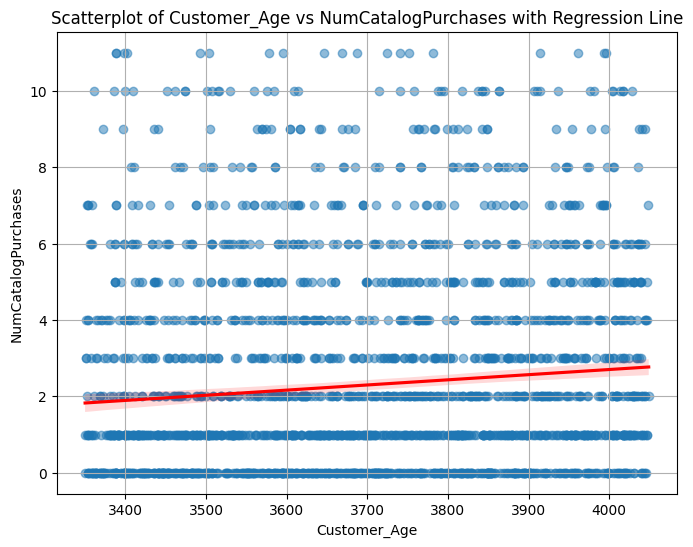

Linear Regression Results for Customer_Age vs NumCatalogPurchases:
Slope: 0.0013, Intercept: -2.1077, R-squared: 0.0088, P-value: 0.0000, Std Err: 0.0003


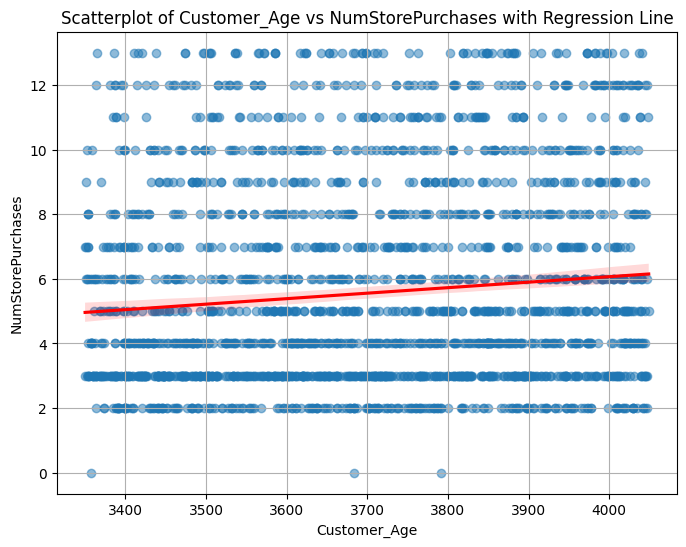

Linear Regression Results for Customer_Age vs NumStorePurchases:
Slope: 0.0017, Intercept: -0.5322, R-squared: 0.0115, P-value: 0.0000, Std Err: 0.0003


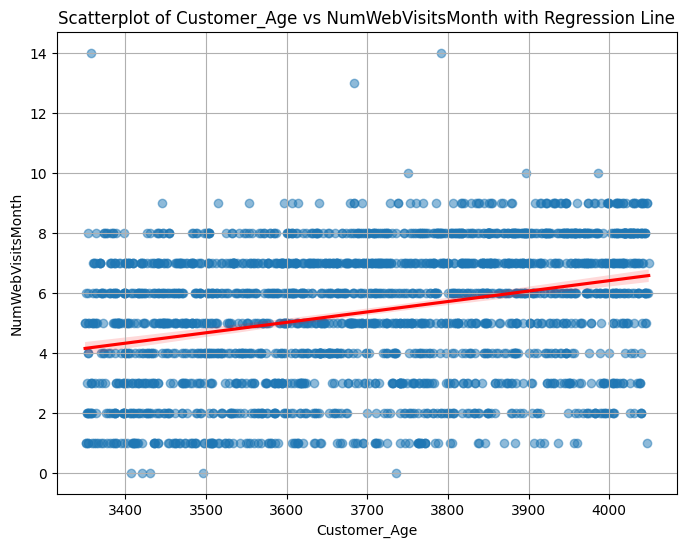

Linear Regression Results for Customer_Age vs NumWebVisitsMonth:
Slope: 0.0033, Intercept: -6.8694, R-squared: 0.0843, P-value: 0.0000, Std Err: 0.0002


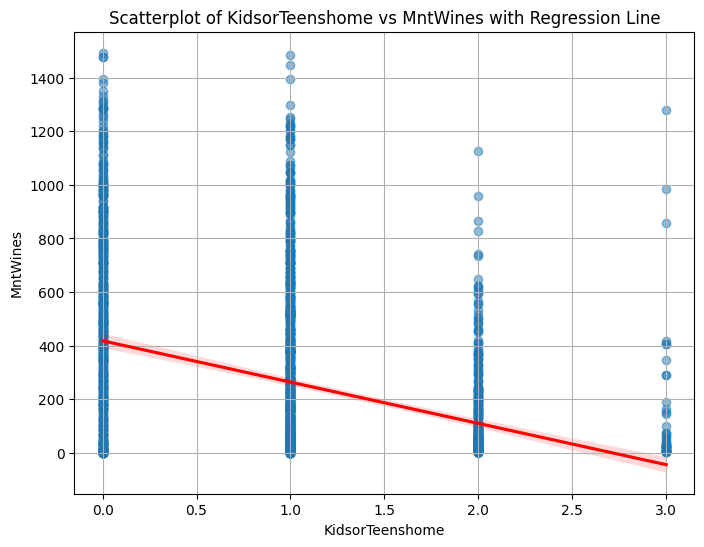

Linear Regression Results for KidsorTeenshome vs MntWines:
Slope: -164.5704, Intercept: 453.3990, R-squared: 0.1369, P-value: 0.0000, Std Err: 9.0165


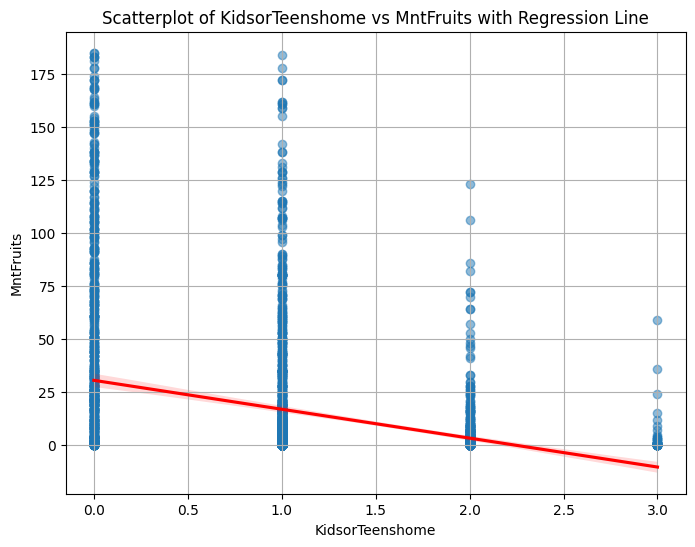

Linear Regression Results for KidsorTeenshome vs MntFruits:
Slope: -21.0047, Intercept: 45.4621, R-squared: 0.1671, P-value: 0.0000, Std Err: 1.0235


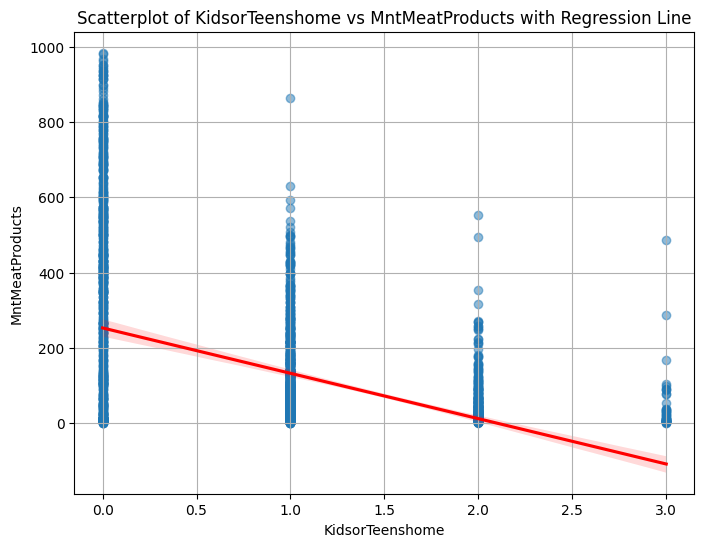

Linear Regression Results for KidsorTeenshome vs MntMeatProducts:
Slope: -152.2428, Intercept: 306.0105, R-squared: 0.2792, P-value: 0.0000, Std Err: 5.3384


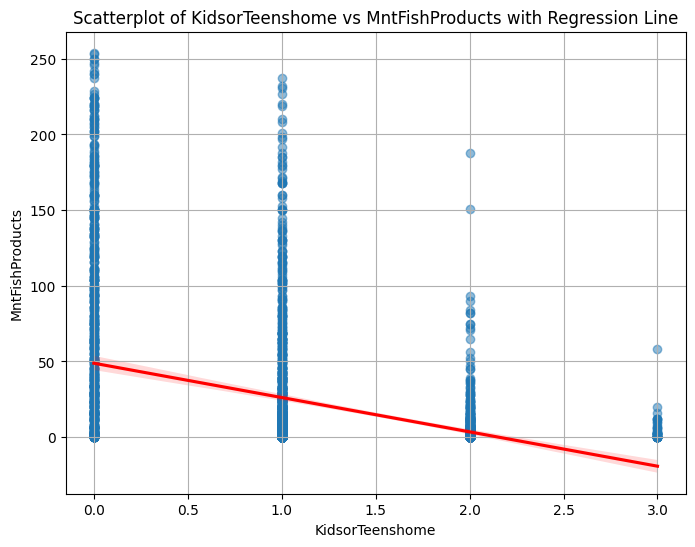

Linear Regression Results for KidsorTeenshome vs MntFishProducts:
Slope: -32.3282, Intercept: 67.4590, R-squared: 0.2017, P-value: 0.0000, Std Err: 1.4034


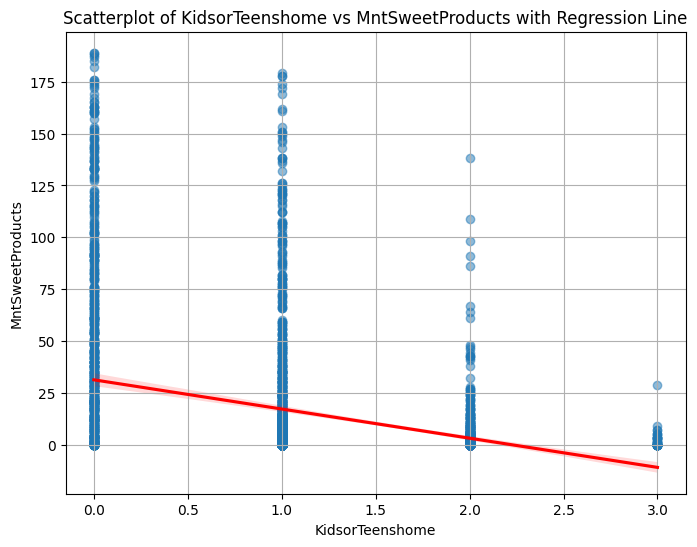

Linear Regression Results for KidsorTeenshome vs MntSweetProducts:
Slope: -21.0809, Intercept: 45.7928, R-squared: 0.1641, P-value: 0.0000, Std Err: 1.0382


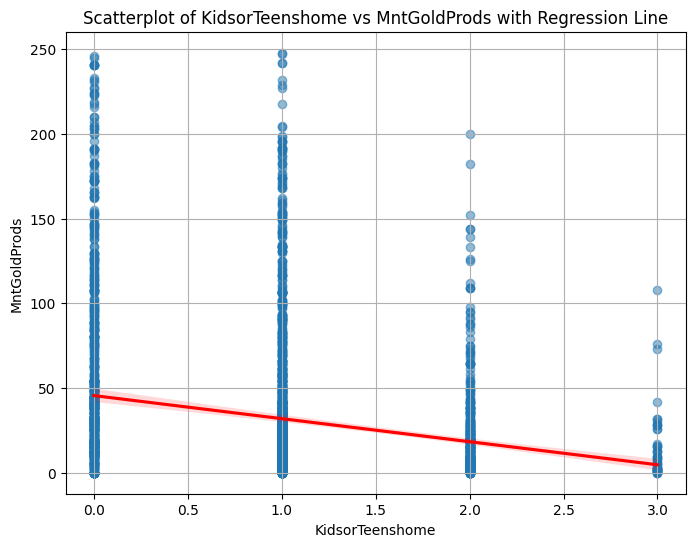

Linear Regression Results for KidsorTeenshome vs MntGoldProds:
Slope: -19.3047, Intercept: 61.0632, R-squared: 0.0812, P-value: 0.0000, Std Err: 1.4171


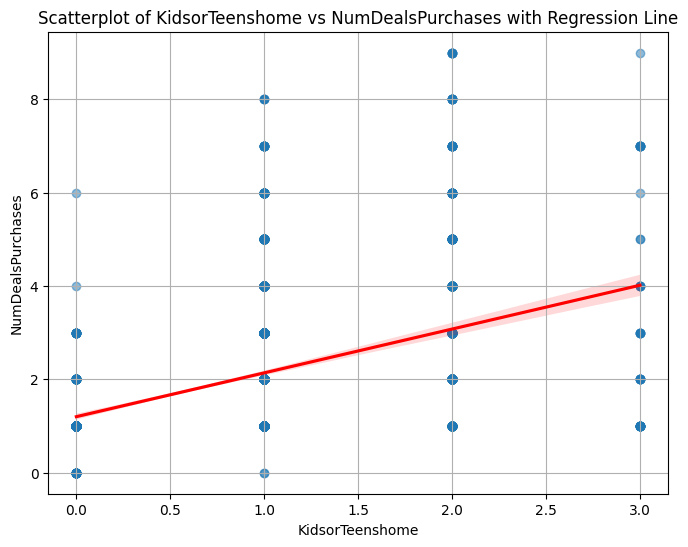

Linear Regression Results for KidsorTeenshome vs NumDealsPurchases:
Slope: 1.0244, Intercept: 1.2675, R-squared: 0.2209, P-value: 0.0000, Std Err: 0.0420


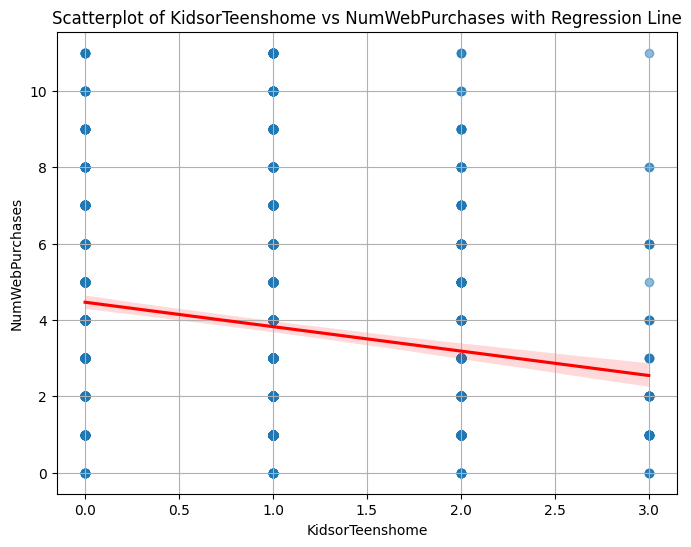

Linear Regression Results for KidsorTeenshome vs NumWebPurchases:
Slope: -0.6043, Intercept: 4.6124, R-squared: 0.0295, P-value: 0.0000, Std Err: 0.0756


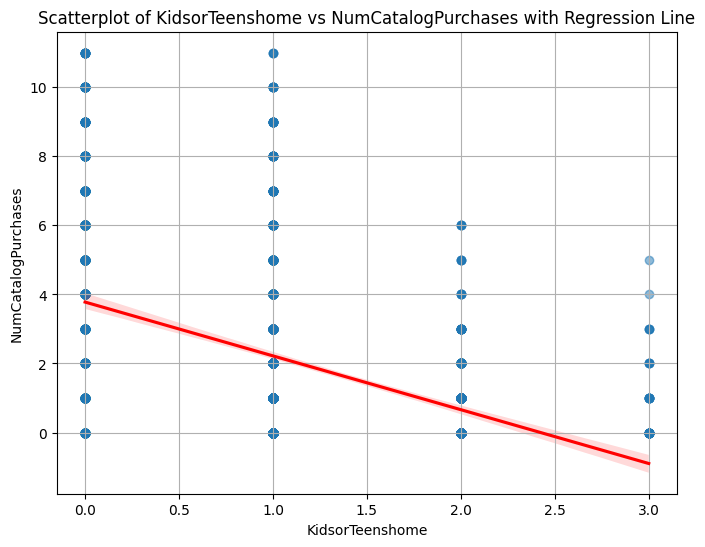

Linear Regression Results for KidsorTeenshome vs NumCatalogPurchases:
Slope: -1.7148, Intercept: 4.1990, R-squared: 0.2185, P-value: 0.0000, Std Err: 0.0708


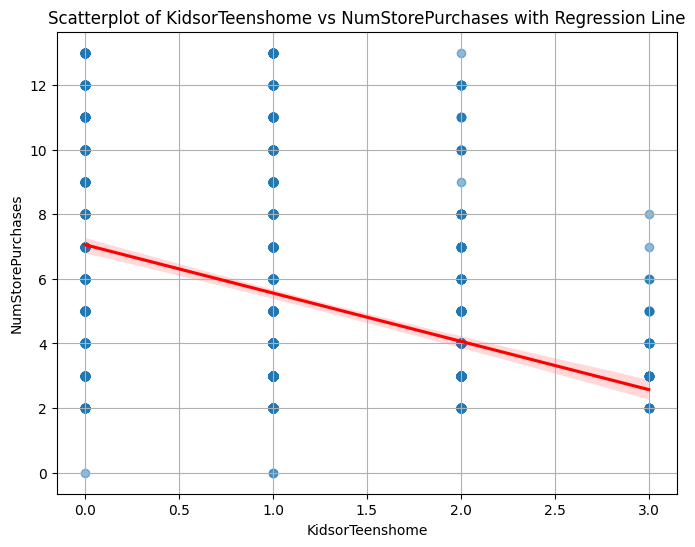

Linear Regression Results for KidsorTeenshome vs NumStorePurchases:
Slope: -1.4766, Intercept: 7.1705, R-squared: 0.1169, P-value: 0.0000, Std Err: 0.0886


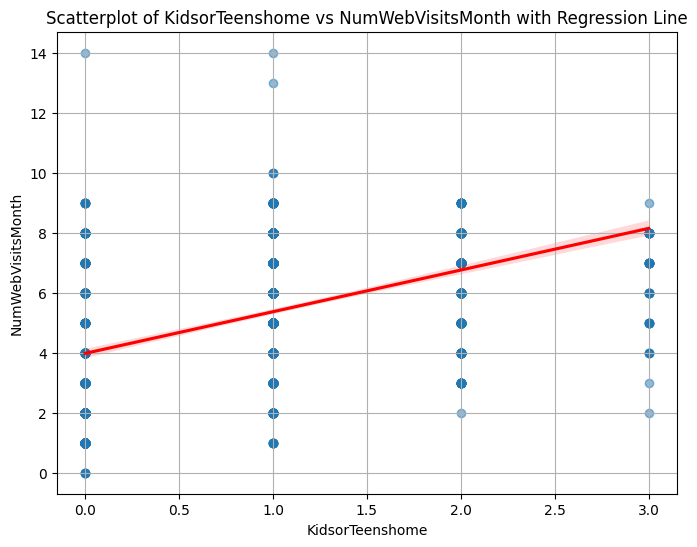

Linear Regression Results for KidsorTeenshome vs NumWebVisitsMonth:
Slope: 1.3272, Intercept: 4.0591, R-squared: 0.1847, P-value: 0.0000, Std Err: 0.0608


In [455]:
# although education is a categorical type of information, there's some hierarchy in it
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

for ex_var in explanatory_vars:
    if df2[ex_var].dtype != 'object':
        for res_var in response_vars:
            if res_var != ex_var: 
                plt.figure(figsize=(8, 6))
                regplot = sns.regplot(x=ex_var, y=res_var, data=df2, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, robust=True)
                slope, intercept, r_value, p_value, std_err = stats.linregress(df2[ex_var], df2[res_var])
                r_squared = r_value**2  # Calculate R-squared value
                line_data = regplot.get_lines()[0].get_data()
                x_coord = line_data[0][2]  
                y_coord = line_data[1][2]   
                plt.xlabel(ex_var)
                plt.ylabel(res_var)
                plt.title(f'Scatterplot of {ex_var} vs {res_var} with Regression Line')
                plt.grid(True)
                plt.show()
                print(f"Linear Regression Results for {ex_var} vs {res_var}:")
                print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}, R-squared: {r_squared:.4f}, P-value: {p_value:.4f}, Std Err: {std_err:.4f}")
    else:
        for res_var in response_vars:
            plt.figure(figsize=(8, 6))

            if ex_var == "Education":  # Specify the categories with order
                ax = sns.boxplot(x=ex_var, y=res_var, data=df2, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"red"}, order=education_order)
                mean_values = df2.groupby(ex_var)[res_var].mean()

            else:
                ax = sns.boxplot(x=ex_var, y=res_var, data=df2, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"red"})

            plt.xlabel(ex_var)
            plt.ylabel(res_var)
            plt.title(f'Boxplot of {ex_var} vs {res_var}')
            plt.grid(True)
            plt.show()



### That's plenty of info! It appears there are some correlations, but in order to do safe recommendations we must look at the P-Values.

# 5 - Significance analysis

### In order to assure that there is a correlation between variables, we must verify the p-value. The standard for marking some correlation as too improbable is if p-value < 0.05.

In [456]:
for ex_var in explanatory_vars:
    if df2[ex_var].dtype != 'object':
        for res_var in response_vars:
            if res_var != ex_var: 
                slope, intercept, r_value, p_value, std_err = stats.linregress(df2[ex_var], df2[res_var])
                r_squared = r_value**2  # Calculate R-squared value
                if p_value < 0.05:
                     print(f"There is significant statistical evidence at the 0.05 level that there is a correlation between {ex_var} and {res_var}. Approximately {r_squared} of the variability in {res_var} is explained by {ex_var}")
                else:
                     print(f"There is no significant statistical evidence at the 0.05 level that there is a correlation between {ex_var} and {res_var}.")
    else:
        for res_var in response_vars:
            for ex_var in explanatory_vars:  # Loop over all explanatory variables
                r_value, p_value = correlation_ratio_with_p_value(df2[ex_var], df2[res_var])
                r_squared = r_value**2
                if p_value < 0.05:
                    print(f"There is significant statistical evidence at the 0.05 level that there is a correlation between {ex_var} and {res_var}. Approximately {r_squared} of the variability in {res_var} is explained by {ex_var}")
                else:
                    print(f"There is no significant statistical evidence at the 0.05 level that there is a correlation between {ex_var} and {res_var}.")
                          

There is significant statistical evidence at the 0.05 level that there is a correlation between Age and MntWines. Approximately 0.028121601791642133 of the variability in MntWines is explained by Age
There is no significant statistical evidence at the 0.05 level that there is a correlation between Age and MntFruits.
There is significant statistical evidence at the 0.05 level that there is a correlation between Age and MntMeatProducts. Approximately 0.0029689749361681145 of the variability in MntMeatProducts is explained by Age
There is significant statistical evidence at the 0.05 level that there is a correlation between Age and MntFishProducts. Approximately 0.0019251174794595908 of the variability in MntFishProducts is explained by Age
There is no significant statistical evidence at the 0.05 level that there is a correlation between Age and MntSweetProducts.
There is significant statistical evidence at the 0.05 level that there is a correlation between Age and MntGoldProds. Approxima

### Here we have all of the probable and improbable correlation, accompanied by how strong they seem. Let's filter for only the merely strong ones.

In [457]:
for ex_var in explanatory_vars:
    if df2[ex_var].dtype != 'object':
        for res_var in response_vars:
            if res_var != ex_var: 
                slope, intercept, r_value, p_value, std_err = stats.linregress(df2[ex_var], df2[res_var])
                r_squared = r_value**2  # Calculate R-squared value
                if p_value < 0.05 and r_squared > 0.1:
                     print(f"There is significant statistical evidence at the 0.05 level that there is a correlation between {ex_var} and {res_var}. Approximately {r_squared} of the variability in {res_var} is explained by {ex_var}")
                else:
                     continue
    else:
        for res_var in response_vars:
            for ex_var in explanatory_vars:  # Loop over all explanatory variables
                r_value, p_value = correlation_ratio_with_p_value(df2[ex_var], df2[res_var])
                r_squared = r_value**2
                if p_value < 0.05 and r_squared > 0.1:
                    print(f"There is significant statistical evidence at the 0.05 level that there is a correlation between {ex_var} and {res_var}. Approximately {r_squared} of the variability in {res_var} is explained by {ex_var}")
                else:
                    continue

There is significant statistical evidence at the 0.05 level that there is a correlation between Income and MntWines. Approximately 0.9960364617213583 of the variability in MntWines is explained by Income
There is significant statistical evidence at the 0.05 level that there is a correlation between Customer_Age and MntWines. Approximately 0.3859375289933877 of the variability in MntWines is explained by Customer_Age
There is significant statistical evidence at the 0.05 level that there is a correlation between KidsorTeenshome and MntWines. Approximately 0.14934787247992604 of the variability in MntWines is explained by KidsorTeenshome
There is significant statistical evidence at the 0.05 level that there is a correlation between Income and MntFruits. Approximately 0.9917391090968251 of the variability in MntFruits is explained by Income
There is significant statistical evidence at the 0.05 level that there is a correlation between KidsorTeenshome and MntFruits. Approximately 0.19454871

### That's too much correlations. How about we just see the main ones?

In [458]:
for ex_var in explanatory_vars:
    if df2[ex_var].dtype != 'object':
        max_corr = -1.0  # Initialize maximum correlation
        min_corr = 1.0   # Initialize minimum correlation
        best_res_var = None  # Initialize best response variable for highest correlation
        worst_res_var = None  # Initialize worst response variable for lowest correlation
        for res_var in response_vars:
            if res_var != ex_var: 
                slope, intercept, r_value, p_value, std_err = stats.linregress(df2[ex_var], df2[res_var])
                if p_value < 0.05:
                    if r_value > max_corr:
                        max_corr = r_value
                        best_res_var = res_var
                    if r_value < min_corr:
                        min_corr = r_value
                        worst_res_var = res_var
        if best_res_var:
            print(f"For {ex_var}:")
            print(f"The response variable with the highest correlation is {best_res_var} with an R-value of {max_corr:.4f}")
            print(f"The response variable with the lowest correlation is {worst_res_var} with an R-value of {min_corr:.4f}")


for ex_var in explanatory_vars:
    if df2[ex_var].dtype == 'object':
        max_corr = -1.0  # Initialize maximum correlation
        min_corr = 1.0   # Initialize minimum correlation
        best_res_var = None  # Initialize best response variable for highest correlation
        worst_res_var = None  # Initialize worst response variable for lowest correlation
        for res_var in response_vars:
            r_value, p_value = correlation_ratio_with_p_value(df2[ex_var], df2[res_var])
            if p_value < 0.05:
                if r_value > max_corr:
                    max_corr = r_value
                    best_res_var = res_var
                if r_value < min_corr:
                    min_corr = r_value
                    worst_res_var = res_var
        if best_res_var:
            print(f"For {ex_var}:")
            print(f"The response variable with the highest correlation is {best_res_var} with an R-value of {max_corr:.4f}")
            print(f"The response variable with the lowest correlation is {worst_res_var} with an R-value of {min_corr:.4f}")

For Age:
The response variable with the highest correlation is MntWines with an R-value of 0.1677
The response variable with the lowest correlation is NumWebVisitsMonth with an R-value of -0.1352
For Income:
The response variable with the highest correlation is MntWines with an R-value of 0.7465
The response variable with the lowest correlation is NumWebVisitsMonth with an R-value of -0.6611
For Customer_Age:
The response variable with the highest correlation is NumWebVisitsMonth with an R-value of 0.2903
The response variable with the lowest correlation is MntFruits with an R-value of 0.0739
For KidsorTeenshome:
The response variable with the highest correlation is NumDealsPurchases with an R-value of 0.4700
The response variable with the lowest correlation is MntMeatProducts with an R-value of -0.5284
For Education:
The response variable with the highest correlation is MntWines with an R-value of 0.2343
The response variable with the lowest correlation is NumWebVisitsMonth with an R-

# Final considerations

### We already made some considerations regarding the Super Market Clients in the step-1: Univariate Data. The Super Market has wealthy clients overall, with high values of Income and Education. Age also seems to be over the average. The products basket, with high ticker products like wine and meat, edifies this point.

### Regarding marketing campaigns, the correlations we found can be used to direct specific ads to some clients. 

### Older clients purchase wine and are less prone to visit the company website

### Rich clients also like wine and don't use the website alot (Which may be caused by the confounding of income, or vice-versa)

### Recent clients don't use the website a lot, possibly due to a low focus on the platform (They may first visit the space and later discover the web platform). As they become older clients, their consumption of fruit doesn't grow as much as other products, possibly due to fruit being the flagship of the supermarket and receiving good marketing already.

### Number of kids or teens home is related to deals purchases and negatively affects all of the consumed ammounts. That probably is caused by a negative correlation with income

### Educated people tend to like wine. Interestingly, they don't tend to use the web much more than their uneducated counterparts. Still, seeing the relation between income and web visits and education and income, that's impressive.

### More in depth analysi could be made by eliminating income confounding, evaluating the CMP rows and clusterizing the client profiles. Still, with the advice here presented, I hope the market finds ways to be more efficient!